<center> <h1> Week 13 - Final Project Code </h1> </center>

<center><h1> Data Science:: Bank Marketing (Campaign)<br> <br>
Group Project <br> </h1></center>
<hr>

## Team Member's Details:
- Group Name: Data Girl.
- Name: Fatimah Asiri.
- Email: alassirifatima@gmail.com
- Country: Saudi Arabia.
- College/Company: Freelancer.
- Specialization:  Data Science.
<hr>

## Problem Description:
- ABC Bank wants to sell its term deposit product to customers and before launching the product they want to develop a model which helps in understanding whether a particular customer will buy its product or not (based on the customer's past interaction with the bank or other Financial institutions).


## Task:

1. Business Understanding
2. Data understanding
3. Exploratory data Analysis
4. Data Preparation
5. Model Building ( Logistic Regression, ensemble, Boosting etc)
6. Model Selection
7. Performance reporting
8. Converting ML metrics into Business metric and explaining result to business

<hr>

### 1. Business understanding
- Bank wants to use the ML model to shortlist customer whose chances of buying the product is more so that their marketing channels marketing SMS/email marketing, etc. can focus only on those customers whose chances of buying the product is more.

- This will save resources and time (which is directly involved in the cost (of resource billing).

- Develop a model with Duration and without duration features and report the performance of the model.

- The duration feature is not recommended as this will be difficult to explain the result to the business and also it will be difficult for businesses to campaign based on duration.


<hr>

### 2. Data understanding

#### 2.1. Import Libraries

In [191]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import OrdinalEncoder

from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

# Bulid Models 
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.naive_bayes import BernoulliNB

from sklearn.model_selection import train_test_split

from yellowbrick.classifier import ROCAUC
import plotly.graph_objects as go

#### 2.2. Load Data

In [192]:
# read csv file by pandas
df=pd.read_csv('Bank.csv')

#### 2.3. Basics information about data

In [193]:
# to see first 5 rows in data 
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,59,management,married,tertiary,no,2143,yes,no,cellular,28,jan,59,1,268,1,failure,no
1,40,management,married,tertiary,no,378,yes,yes,cellular,28,jan,260,1,268,2,failure,no
2,28,admin.,married,tertiary,no,654,no,no,cellular,28,jan,198,1,-1,0,unknown,no
3,46,technician,married,tertiary,no,0,yes,no,cellular,28,jan,58,1,-1,0,unknown,no
4,54,technician,married,secondary,no,1076,no,no,cellular,28,jan,338,1,-1,0,unknown,no


<hr>

In [194]:
# to see basic infornation about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49732 entries, 0 to 49731
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        49732 non-null  int64 
 1   job        49732 non-null  object
 2   marital    49732 non-null  object
 3   education  49732 non-null  object
 4   default    49732 non-null  object
 5   balance    49732 non-null  int64 
 6   housing    49732 non-null  object
 7   loan       49732 non-null  object
 8   contact    49732 non-null  object
 9   day        49732 non-null  int64 
 10  month      49732 non-null  object
 11  duration   49732 non-null  int64 
 12  campaign   49732 non-null  int64 
 13  pdays      49732 non-null  int64 
 14  previous   49732 non-null  int64 
 15  poutcome   49732 non-null  object
 16  y          49732 non-null  object
dtypes: int64(7), object(10)
memory usage: 6.5+ MB


In [195]:
# to know how many rows and columns
print("The Shape of Dataset:",df.shape)

The Shape of Dataset: (49732, 17)


In [196]:
# to see waht the data types for each column
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [197]:
# to Generate descriptive statistics for numeric  
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,49732.000000,49732.000000,49732.000000,49732.000000,49732.000000,49732.000000,49732.000000
mean,40.957472,1367.761562,15.816315,258.690179,2.766549,40.158630,0.576892
std,10.615008,3041.608766,8.315680,257.743149,3.099075,100.127123,2.254838
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1431.000000,21.000000,320.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [198]:
# to Generate descriptive statistics for obiect
df.describe(include=['object']) 

,job,marital,education,default,housing,loan,contact,month,poutcome,y
count,49732,49732,49732,49732,49732,49732,49732,49732,49732,49732
unique,12,3,4,2,2,2,3,12,4,2
top,blue-collar,married,secondary,no,yes,no,cellular,may,unknown,no
freq,10678,30011,25508,48841,27689,41797,32181,15164,40664,43922


#### 2.4. checking on missing values

In [199]:
# check on missing data in coulmns
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

#### 2.5. checking on dulicates rows

In [200]:
#identify duplicate rows
duplicateRows = df[df.duplicated()]
#view duplicate rows
duplicateRows

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
1403,31,blue-collar,married,secondary,no,360,yes,yes,cellular,29,jan,89,1,241,1,failure,no
1404,26,housemaid,married,tertiary,no,543,no,no,cellular,30,jan,169,3,-1,0,unknown,no
1405,61,admin.,married,unknown,no,4629,yes,no,cellular,27,jan,181,1,92,1,success,yes
1406,31,services,married,secondary,no,338,yes,no,cellular,28,jan,155,1,-1,0,unknown,no
1407,33,blue-collar,single,secondary,no,22,no,no,cellular,30,jan,76,2,207,1,failure,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49727,36,technician,married,tertiary,no,629,yes,yes,cellular,29,dec,109,1,246,1,failure,no
49728,58,admin.,single,secondary,no,2223,no,no,cellular,4,dec,1139,2,114,1,success,no
49729,47,management,single,tertiary,no,4402,no,no,telephone,10,dec,805,1,190,1,other,yes
49730,24,student,single,secondary,no,1847,no,no,cellular,9,dec,390,1,-1,0,unknown,no


In [201]:
# drop duplicates rows
df.drop_duplicates(keep=False)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,59,management,married,tertiary,no,2143,yes,no,cellular,28,jan,59,1,268,1,failure,no
1,40,management,married,tertiary,no,378,yes,yes,cellular,28,jan,260,1,268,2,failure,no
2,28,admin.,married,tertiary,no,654,no,no,cellular,28,jan,198,1,-1,0,unknown,no
3,46,technician,married,tertiary,no,0,yes,no,cellular,28,jan,58,1,-1,0,unknown,no
4,54,technician,married,secondary,no,1076,no,no,cellular,28,jan,338,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49706,61,management,married,secondary,no,544,no,no,cellular,29,dec,63,3,200,9,success,yes
49707,30,management,single,tertiary,no,2907,yes,no,cellular,30,dec,146,2,218,1,failure,no
49708,46,management,divorced,tertiary,no,461,no,no,cellular,30,dec,369,2,-1,0,unknown,yes
49709,30,housemaid,single,tertiary,no,3185,yes,no,cellular,30,dec,158,3,-1,0,unknown,no


#### 2.6. Analysis the columns

In [202]:
# to see the coulmns names for dataset
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [203]:
# to see how many unique value in each columns
df.nunique()

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
y               2
dtype: int64

In [204]:
# The unquie value in coulmn (age)
df['age'].unique()

array([59, 40, 28, 46, 54, 53, 29, 26, 48, 38, 42, 43, 27, 37, 36, 58, 55,
       30, 57, 60, 32, 47, 34, 51, 49, 33, 52, 41, 44, 31, 50, 45, 39, 56,
       35, 70, 25, 73, 67, 65, 85, 66, 21, 87, 22, 64, 62, 24, 80, 81, 68,
       79, 20, 63, 19, 76, 61, 74, 92, 77, 71, 69, 82, 83, 75, 72, 90, 78,
       23, 84, 18, 94, 86, 95, 93, 89, 88], dtype=int64)

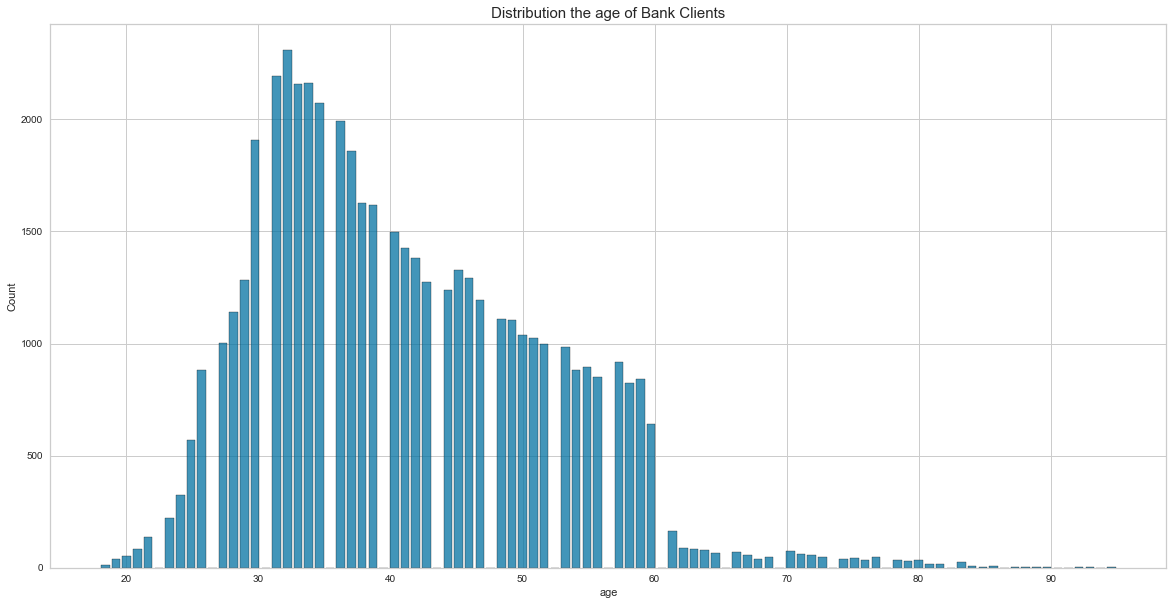

In [205]:
# Figure size
plt.figure(figsize=(20,10))

# Figure title
plt.title(" Distribution the age of Bank Clients ", loc="center",fontsize='15')

# plot
sns.histplot(data= df, x="age" , common_norm=False,shrink=.8,multiple="dodge")

# Figure show
plt.show()

<hr>

In [206]:
# The unquie value in coulmn (job)
df['job'].unique()

array(['management', 'admin.', 'technician', 'unknown', 'unemployed',
       'services', 'housemaid', 'retired', 'blue-collar', 'entrepreneur',
       'student', 'self-employed'], dtype=object)

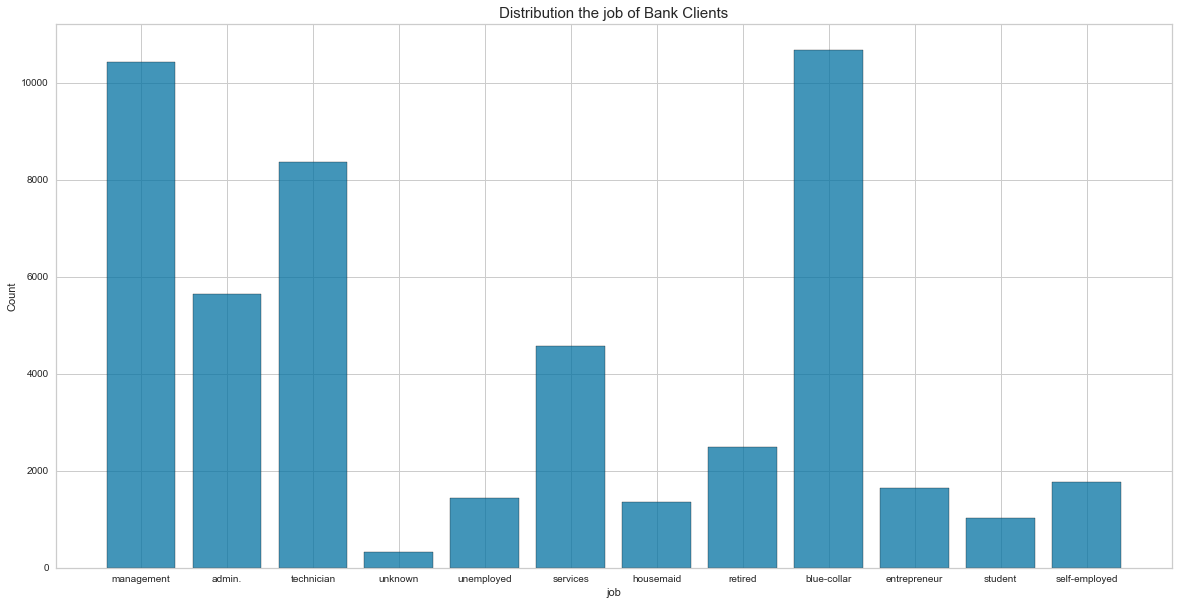

In [207]:
# Figure size
plt.figure(figsize=(20,10))

# Figure title
plt.title(" Distribution the job of Bank Clients ", loc="center",fontsize='15')

# plot
sns.histplot(data= df, x="job" , common_norm=False,shrink=.8,multiple="dodge")

# Figure show
plt.show()

<hr>

In [208]:
# The unquie value in coulmn (marital)
df['marital'].unique()

array(['married', 'single', 'divorced'], dtype=object)

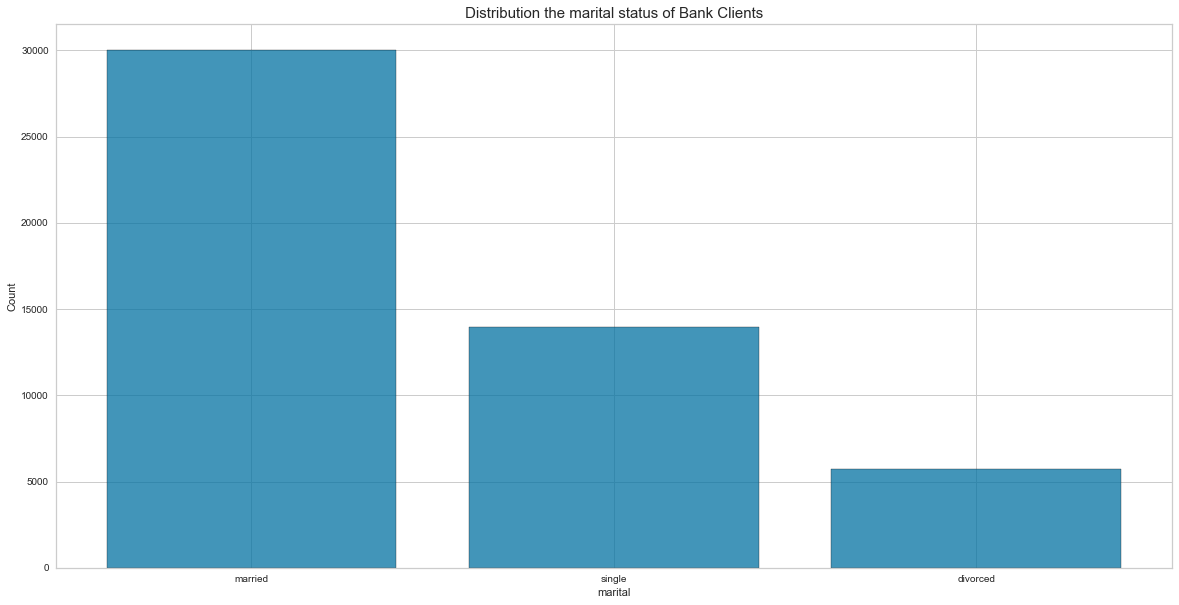

In [209]:
# Figure size
plt.figure(figsize=(20,10))

# Figure title
plt.title(" Distribution the marital status of Bank Clients ", loc="center",fontsize='15')

# plot
sns.histplot(data= df, x="marital" , common_norm=False,shrink=.8,multiple="dodge")

# Figure show
plt.show()

<hr>

In [210]:
# The unquie value in coulmn (education)
df['education'].unique()

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

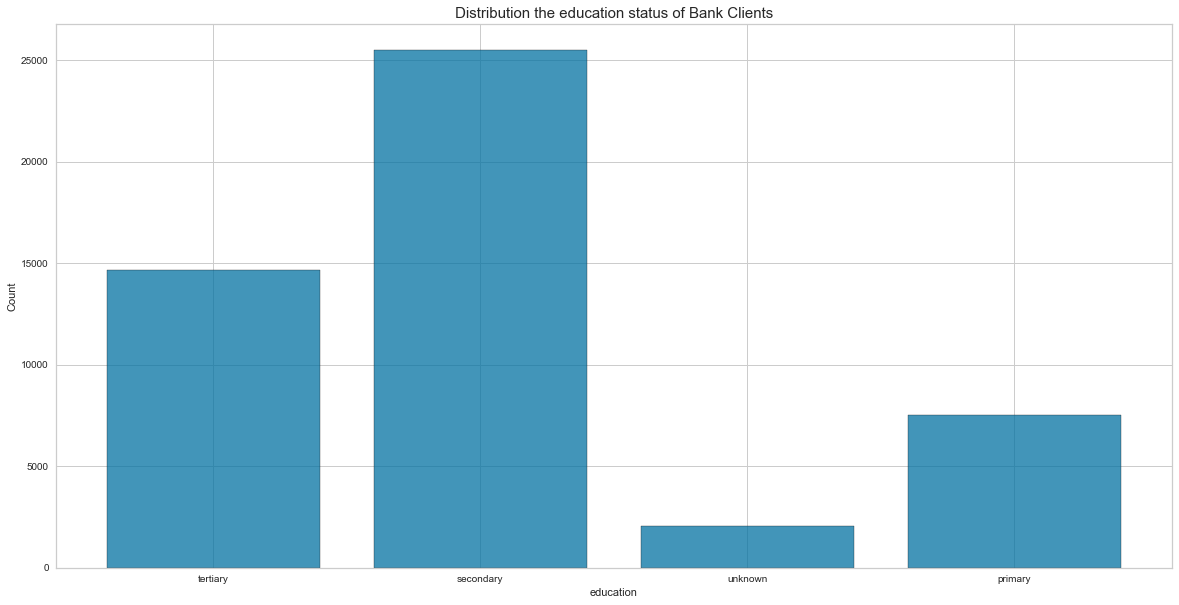

In [211]:
# Figure size
plt.figure(figsize=(20,10))

# Figure title
plt.title(" Distribution the education status of Bank Clients ", loc="center",fontsize='15')

# plot
sns.histplot(data= df, x="education" , common_norm=False,shrink=.8,multiple="dodge")

# Figure show
plt.show()

<hr>

In [212]:
# The unquie value in coulmn (default)
df['default'].unique()

array(['no', 'yes'], dtype=object)

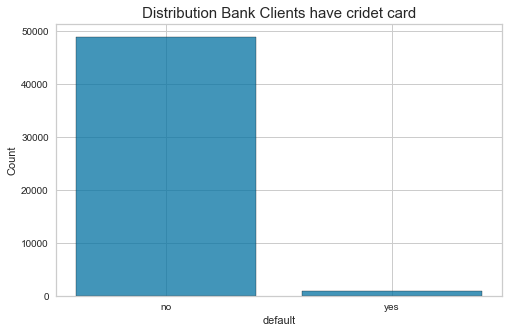

In [213]:
# Figure size
plt.figure(figsize=(8,5))

# Figure title
plt.title(" Distribution Bank Clients have cridet card ", loc="center",fontsize='15')

# plot
sns.histplot(data= df, x="default" , common_norm=False,shrink=.8,multiple="dodge")

# Figure show
plt.show()

<hr>

In [214]:
# The unquie value in coulmn (balance)
df['balance'].unique()

array([ 2143,   378,   654, ...,  7105,  6963, 10788], dtype=int64)

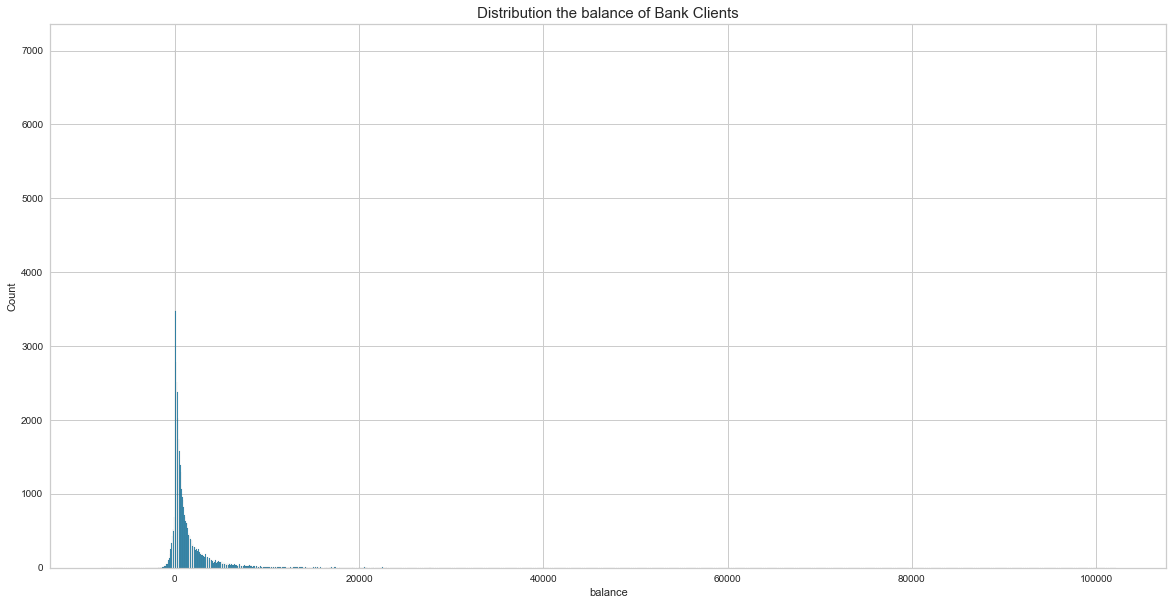

In [215]:
# Figure size
plt.figure(figsize=(20,10))

# Figure title
plt.title(" Distribution the balance of Bank Clients ", loc="center",fontsize='15')

# plot
sns.histplot(data= df, x="balance" , common_norm=False,shrink=.8,multiple="dodge")

# Figure show
plt.show()

<hr>

In [216]:
# The unquie value in coulmn (housing)
df['housing'].unique()

array(['yes', 'no'], dtype=object)

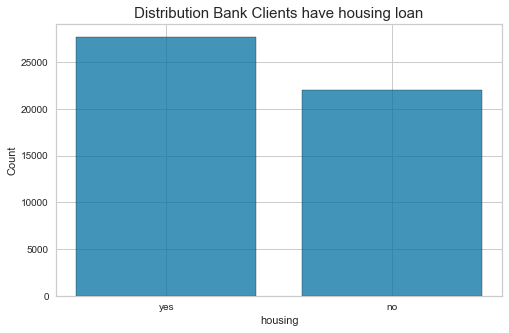

In [217]:
# Figure size
plt.figure(figsize=(8,5))

# Figure title
plt.title(" Distribution Bank Clients have housing loan ", loc="center",fontsize='15')

# plot
sns.histplot(data= df, x="housing" , common_norm=False,shrink=.8,multiple="dodge")

# Figure show
plt.show()

<hr>

In [218]:
# The unquie value in coulmn (loan)
df['loan'].unique()

array(['no', 'yes'], dtype=object)

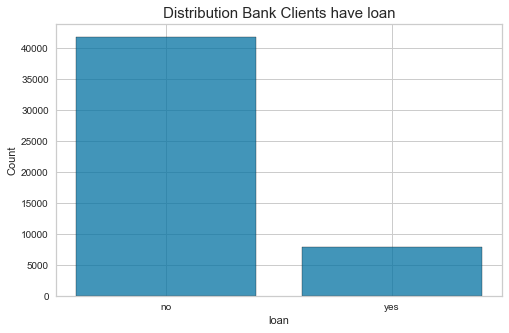

In [219]:
# Figure size
plt.figure(figsize=(8,5))

# Figure title
plt.title(" Distribution Bank Clients have loan ", loc="center",fontsize='15')

# plot
sns.histplot(data= df, x="loan" , common_norm=False,shrink=.8,multiple="dodge")

# Figure show
plt.show()

<hr>

In [220]:
# The unquie value in coulmn (contact)
df['contact'].unique()

array(['cellular', 'telephone', 'unknown'], dtype=object)

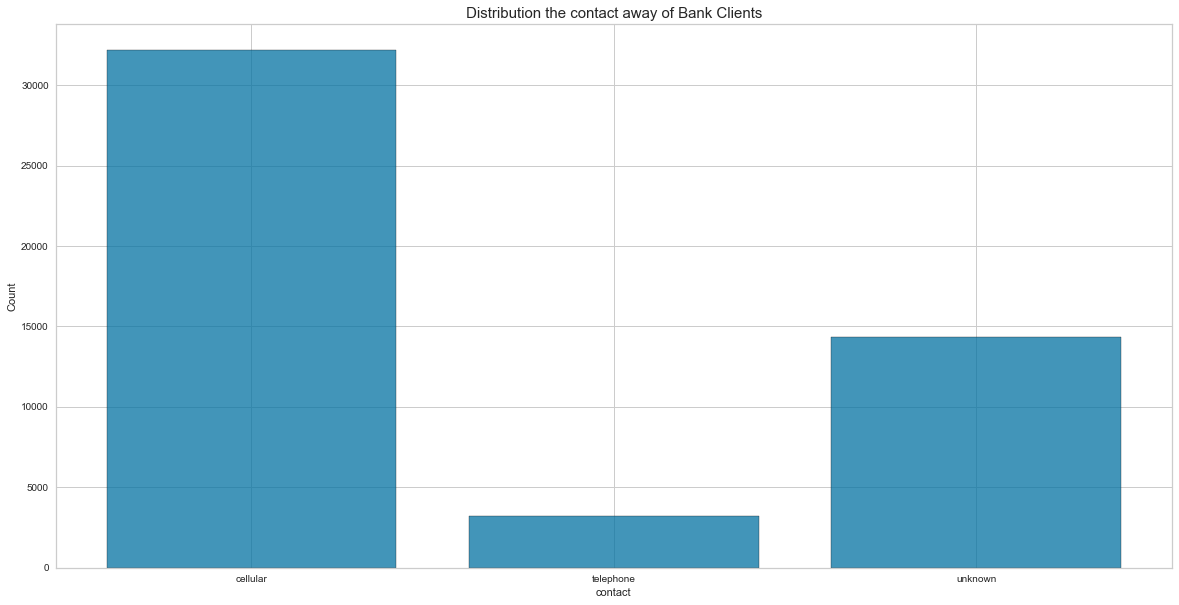

In [221]:
# Figure size
plt.figure(figsize=(20,10))

# Figure title
plt.title(" Distribution the contact away of Bank Clients ", loc="center",fontsize='15')

# plot
sns.histplot(data= df, x="contact" , common_norm=False,shrink=.8,multiple="dodge")

# Figure show
plt.show()

<hr>

In [222]:
# The unquie value in coulmn (day)
df['day'].unique()

array([28, 29, 30,  6,  7,  8, 11, 12, 13, 14, 15, 18, 22, 25, 26, 27,  2,
        3,  4,  5,  9, 10, 16, 17, 19,  1, 21, 23, 24, 20, 31],
      dtype=int64)

In [223]:
# Sorting Values by ascending Order
df.sort_values('day')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
35597,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown,yes
43996,75,retired,married,primary,no,1413,no,no,cellular,1,sep,532,2,188,2,success,yes
43997,18,student,single,unknown,no,438,no,no,cellular,1,sep,425,1,-1,0,unknown,no
43998,59,management,married,tertiary,no,4606,no,no,telephone,1,sep,194,2,189,2,failure,no
43999,22,services,single,secondary,no,361,no,no,telephone,1,sep,232,1,86,6,failure,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35235,46,services,single,secondary,no,389,no,no,telephone,31,jul,46,4,-1,0,unknown,no
35234,38,management,married,tertiary,no,0,no,yes,cellular,31,jul,122,2,-1,0,unknown,no
35233,46,blue-collar,divorced,unknown,no,2391,yes,no,cellular,31,jul,148,2,-1,0,unknown,no
35247,42,management,married,tertiary,no,2110,no,yes,cellular,31,jul,106,2,-1,0,unknown,no


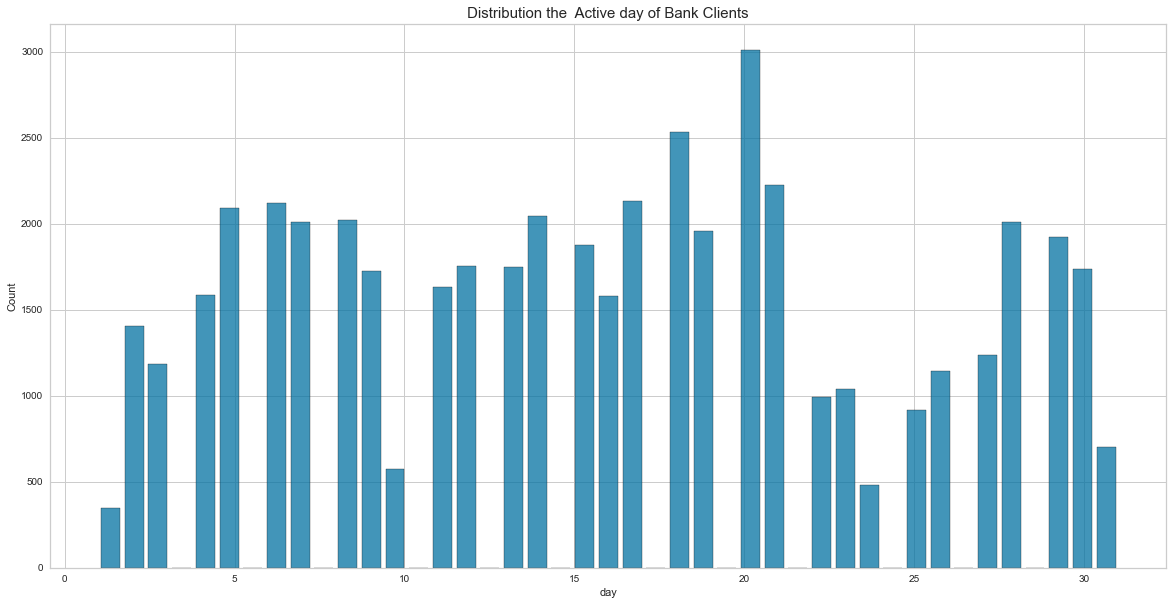

In [224]:
# Figure size
plt.figure(figsize=(20,10))

# Figure title
plt.title(" Distribution the  Active day of Bank Clients ", loc="center",fontsize='15')

# plot
sns.histplot(data= df, x="day" , common_norm=False,shrink=.8,multiple="dodge")

# Figure show
plt.show()

<hr>

In [225]:
# The unquie value in coulmn (month)
df['month'].unique()

array(['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep',
       'oct', 'nov', 'dec'], dtype=object)

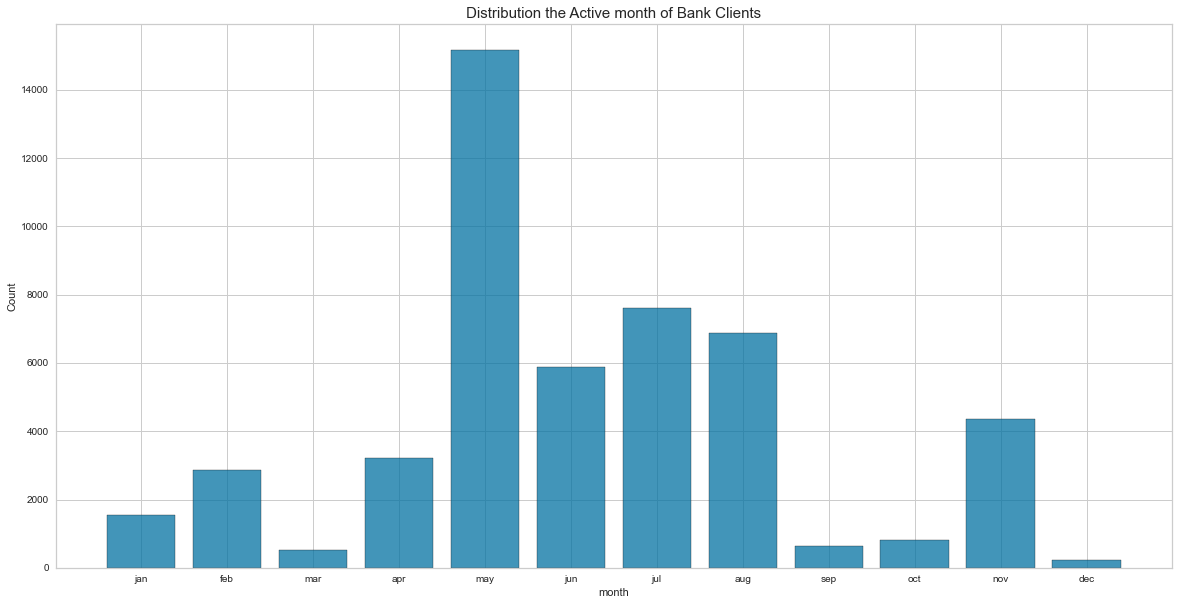

In [226]:
# Figure size
plt.figure(figsize=(20,10))

# Figure title
plt.title(" Distribution the Active month of Bank Clients ", loc="center",fontsize='15')

# plot
sns.histplot(data= df, x="month" , common_norm=False,shrink=.8,multiple="dodge")

# Figure show
plt.show()

<hr>

In [227]:
# The unquie value in coulmn (duration)
df['duration'].unique()

array([  59,  260,  198, ..., 1804, 2062, 1370], dtype=int64)

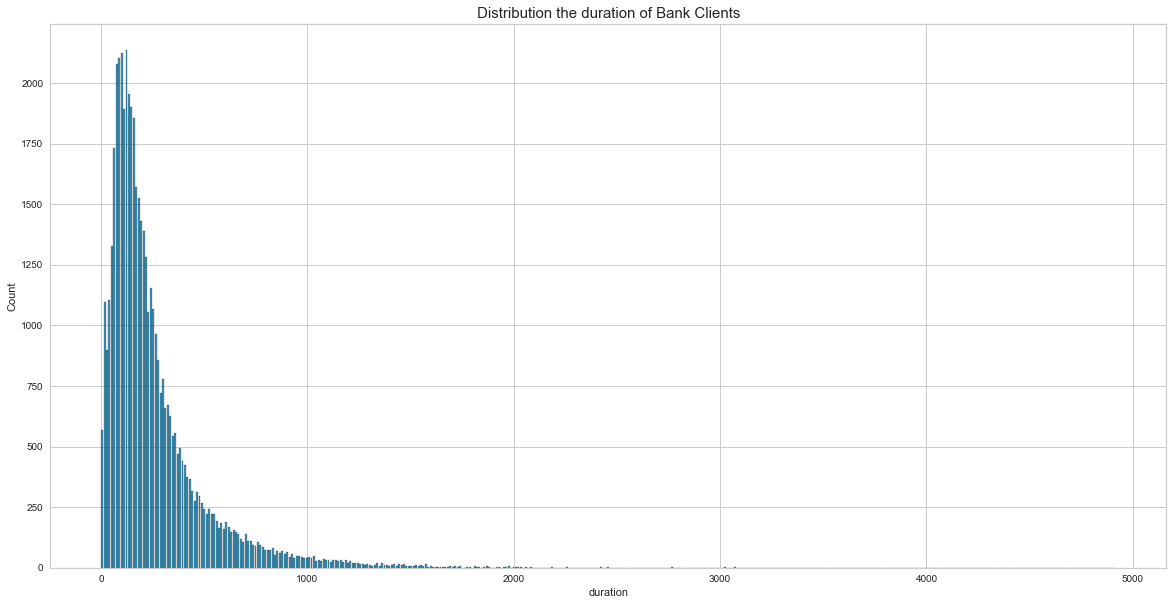

In [228]:
# Figure size
plt.figure(figsize=(20,10))

# Figure title
plt.title(" Distribution the duration of Bank Clients ", loc="center",fontsize='15')

# plot
sns.histplot(data= df, x="duration" , common_norm=False,shrink=.8,multiple="dodge")

# Figure show
plt.show()

<hr>

In [229]:
# The unquie value in coulmn (campaign)
df['campaign'].unique()

array([ 1,  2,  3,  4,  5,  6,  7, 11,  8,  9, 10, 12, 16, 18, 13, 14, 21,
       20, 19, 15, 17, 23, 24, 32, 22, 25, 43, 51, 63, 41, 26, 28, 55, 50,
       38, 29, 31, 37, 30, 46, 27, 58, 33, 35, 34, 36, 39, 44],
      dtype=int64)

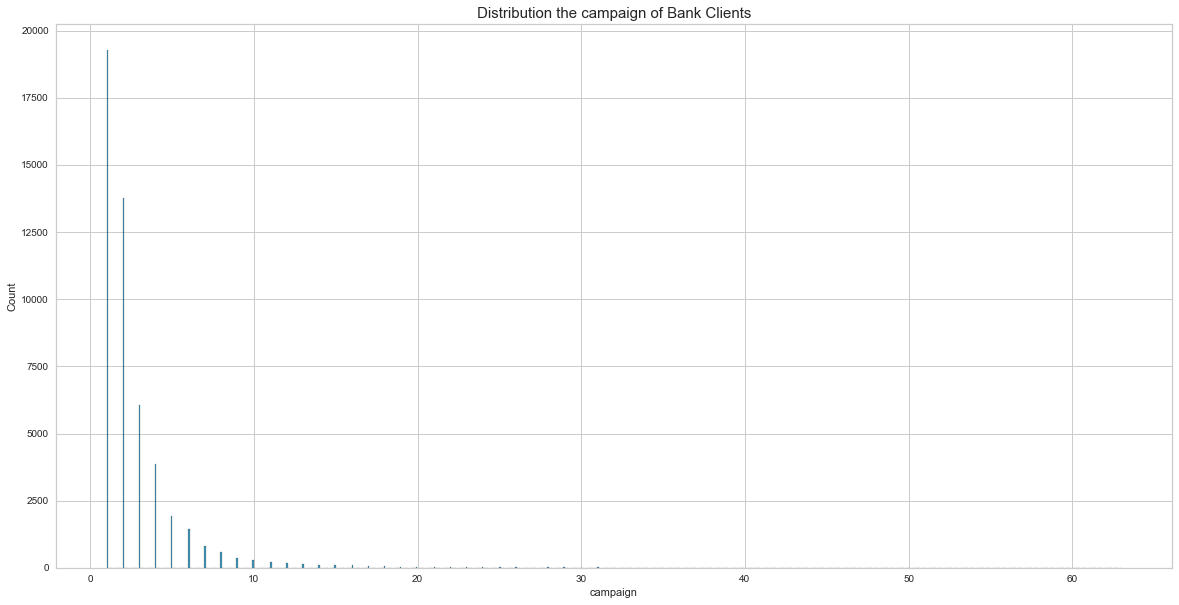

In [230]:
# Figure size
plt.figure(figsize=(20,10))

# Figure title
plt.title(" Distribution the campaign of Bank Clients ", loc="center",fontsize='15')

# plot
sns.histplot(data= df, x="campaign" , common_norm=False,shrink=.8,multiple="dodge")

# Figure show
plt.show()

<hr>

In [231]:
# The unquie value in coulmn (pervious)
df['previous'].unique()

array([  1,   2,   0,   3,   5,   4,   8,   9,   6,  16,   7,  12,  15,
        13,  27,  10,  17,  23,  38,  11,  29,  18,  24,  25,  14,  51,
        40, 275,  20,  28,  22,  19,  21,  30,  58,  32,  55,  26,  35,
        41,  37], dtype=int64)

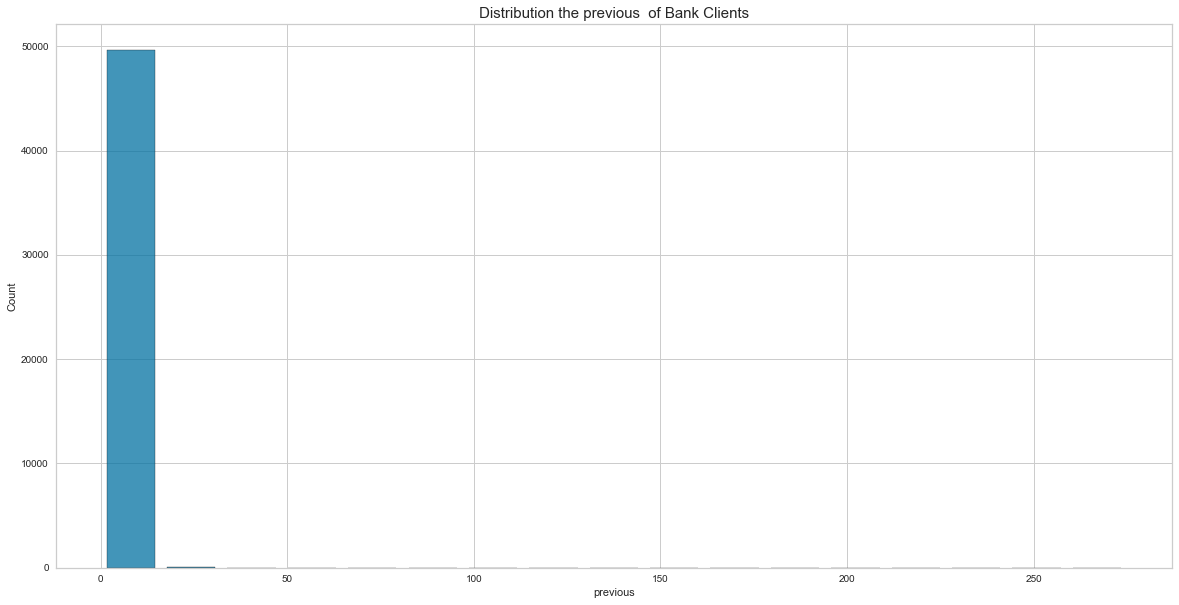

In [232]:
# Figure size
plt.figure(figsize=(20,10))

# Figure title
plt.title(" Distribution the previous  of Bank Clients ", loc="center",fontsize='15')

# plot
sns.histplot(data= df, x="previous" , common_norm=False,shrink=.8,multiple="dodge")

# Figure show
plt.show()

<hr>

In [233]:
# The unquie value in coulmn (pdays)
df['pdays'].unique()

array([268,  -1, 169, 247, 253, 226, 167, 244, 239, 196, 245, 204, 197,
       231, 182, 238, 258, 230, 254, 265, 177, 189, 184,  71, 223, 183,
       246, 181, 190, 154, 198, 163, 191, 153, 176, 250, 266, 240, 156,
       205, 187, 160, 170, 185, 261, 259, 241, 260, 234, 192, 171, 188,
       168, 195, 164, 251, 225, 161, 199, 237, 262, 248, 255, 220, 227,
       206, 162, 224, 158, 249, 235, 228, 263,   2, 270, 232, 252, 207,
       172, 200, 269, 233, 256, 119,  91, 343, 210,  83,  48,  96, 105,
       148,  64, 279,  92, 194,  97,  90,  33, 282,  87,  93, 274, 347,
       276,  94, 272,  67, 115, 285,  95, 280, 201, 544, 283, 301, 151,
        88, 202, 307, 104,  50, 435, 100, 147, 436, 286, 275, 555, 433,
        98, 149, 142, 102, 120, 127, 174,   5, 273, 242, 264, 180, 208,
       214, 222, 271, 193, 203, 221, 216, 186, 175, 257, 229, 217,  75,
       179, 178, 213,  73,  76, 267, 211, 215, 173,  77, 236, 159,  82,
         6, 209,   1, 243,   7, 212,   8,  80,   9,  12, 277,  8

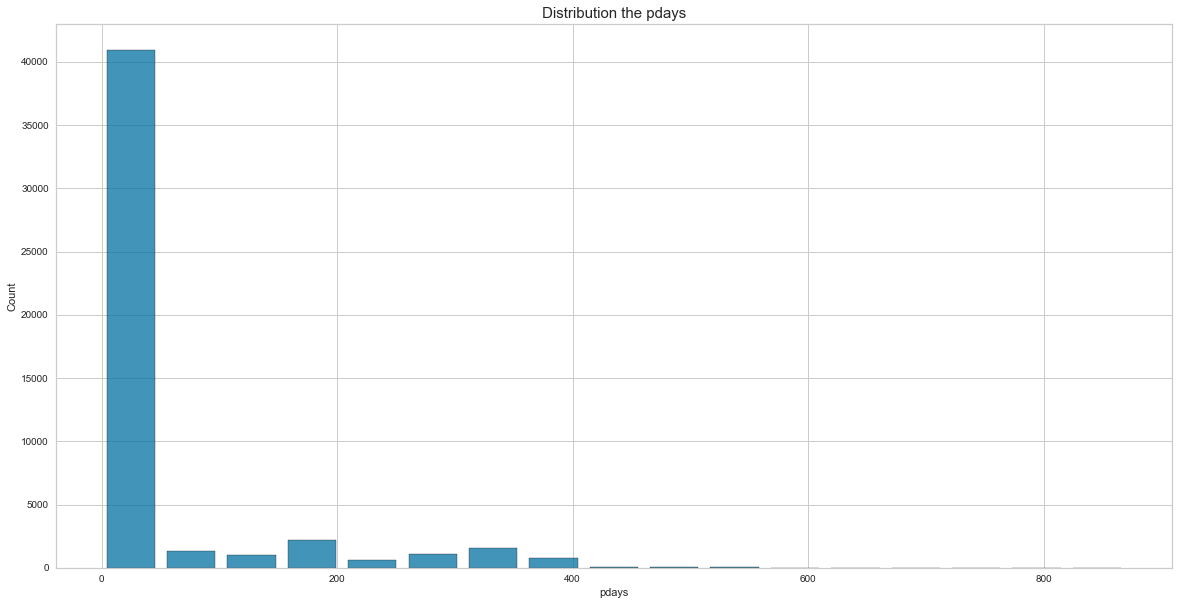

In [234]:
# Figure size
plt.figure(figsize=(20,10))

# Figure title
plt.title(" Distribution the pdays ", loc="center",fontsize='15')

# plot
sns.histplot(data= df, x="pdays" , common_norm=False,shrink=.8,multiple="dodge")

# Figure show
plt.show()

<hr>

In [235]:
# The unquie value in coulmn (y)
df['y'].unique()

array(['no', 'yes'], dtype=object)

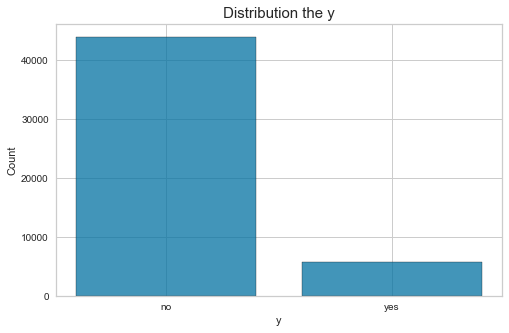

In [236]:
# Figure size
plt.figure(figsize=(8,5))

# Figure title
plt.title(" Distribution the y ", loc="center",fontsize='15')

# plot
sns.histplot(data= df, x="y" , common_norm=False,shrink=.8,multiple="dodge")

# Figure show
plt.show()

<hr>

#### 2.7. Detect Outliers

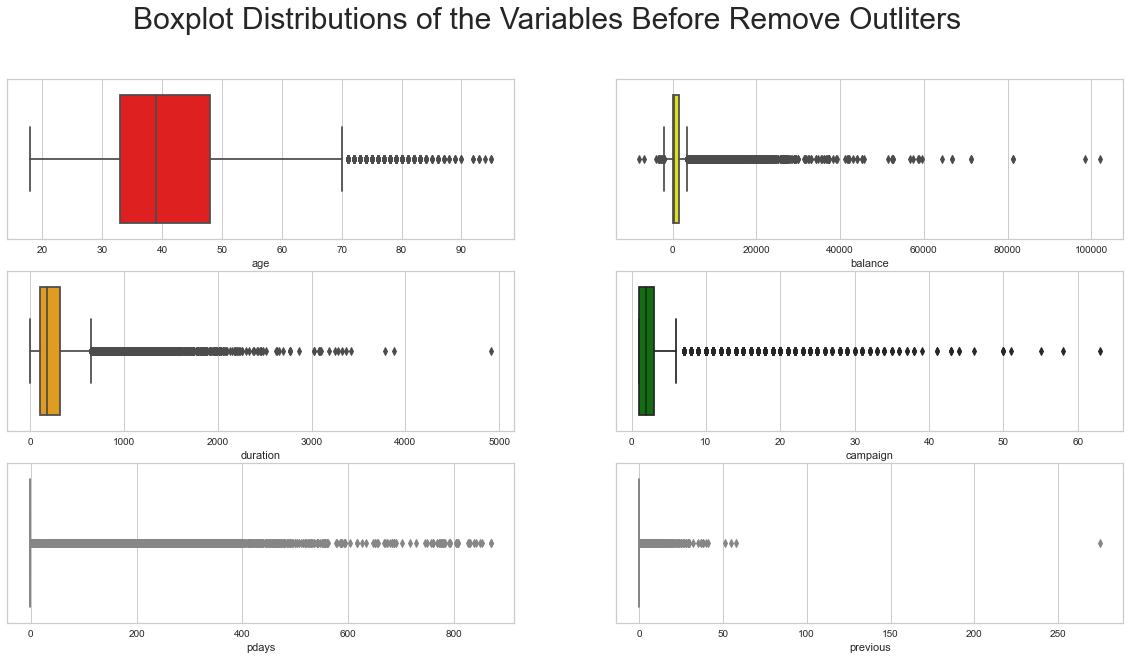

In [237]:
# Detect Outliers
# I using Box Plot to detect Outliers in the dataset
fig,axes = plt.subplots(3,2,figsize=(20, 10), sharey=True)
fig.suptitle('Boxplot Distributions of the Variables Before Remove Outliters',fontsize=30)

sns.boxplot(ax=axes[0,0], x='age',color='red', data=df)
sns.boxplot(ax=axes[0,1], x='balance',color='yellow'  , data=df) 
sns.boxplot(ax=axes[1,0], x='duration' , color='orange' , data=df)
sns.boxplot(ax=axes[1,1], x='campaign' , color='green' ,   data=df)
sns.boxplot(ax=axes[2,0], x='pdays' ,color='pink' ,   data=df)
sns.boxplot(ax=axes[2,1], x='previous' ,color='pink' ,   data=df);

In [238]:
cols = ['pdays', 'campaign', 'previous', 'duration' , 'age' , 'balance'] # The columns you want to search for outliers in

# Calculate quantiles and IQR
Q1 = df[cols].quantile(0.25) # Same as np.percentile but maps (0,1) and not (0,100)
Q3 = df[cols].quantile(0.75)
IQR = Q3 - Q1

# Return a boolean array of the rows with (any) non-outlier column values
condition = ~((df[cols] < (Q1 - 1.5 * IQR)) | (df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)

# Filter our dataframe based on condition
df = df[condition]

In [239]:
df.shape

(30984, 17)

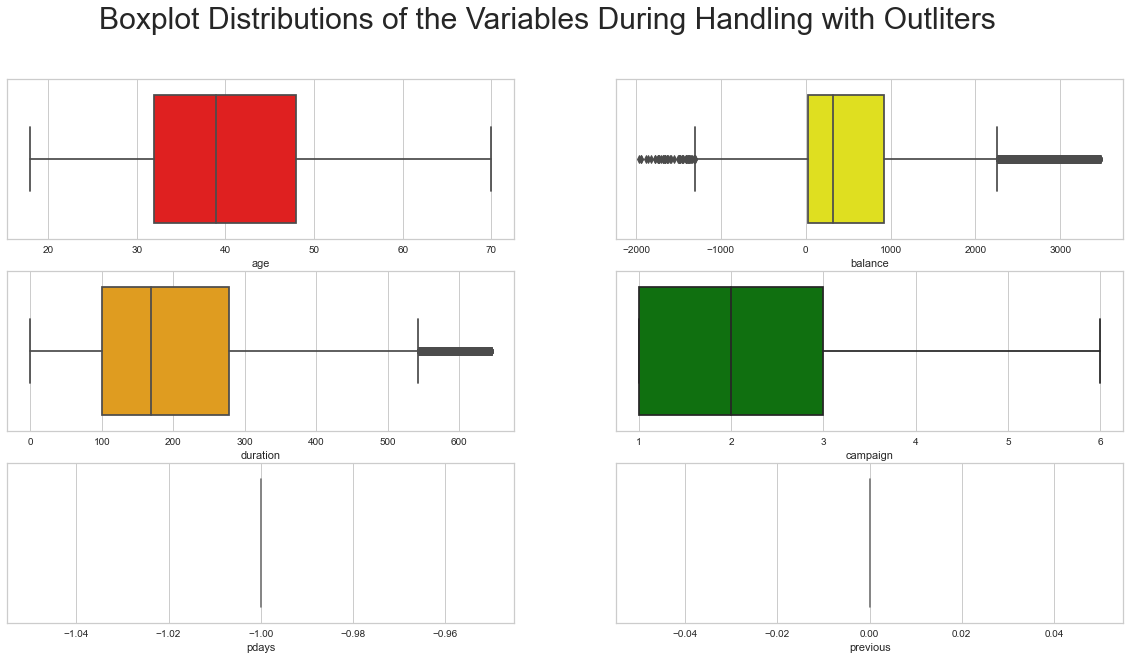

In [240]:
# Detect Outliers
# I using Box Plot to detect Outliers in the dataset
fig,axes = plt.subplots(3,2,figsize=(20, 10), sharey=True)
fig.suptitle('Boxplot Distributions of the Variables During Handling with Outliters',fontsize=30)

sns.boxplot(ax=axes[0,0], x='age',color='red', data=df)
sns.boxplot(ax=axes[0,1], x='balance',color='yellow'  , data=df) 
sns.boxplot(ax=axes[1,0], x='duration' , color='orange' , data=df)
sns.boxplot(ax=axes[1,1], x='campaign' , color='green' ,   data=df)
sns.boxplot(ax=axes[2,0], x='pdays' ,color='pink' ,   data=df)
sns.boxplot(ax=axes[2,1], x='previous' ,color='pink' ,   data=df);

In [241]:
cols = [ 'duration' ,'balance','age'] # The columns you want to search for outliers in

# Calculate quantiles and IQR
Q1 = df[cols].quantile(0.25) # Same as np.percentile but maps (0,1) and not (0,100)
Q3 = df[cols].quantile(0.75)
IQR = Q3 - Q1

# Return a boolean array of the rows with (any) non-outlier column values
condition = ~((df[cols] < (Q1 - 1.5 * IQR)) | (df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)

# Filter our dataframe based on condition
df = df[condition]

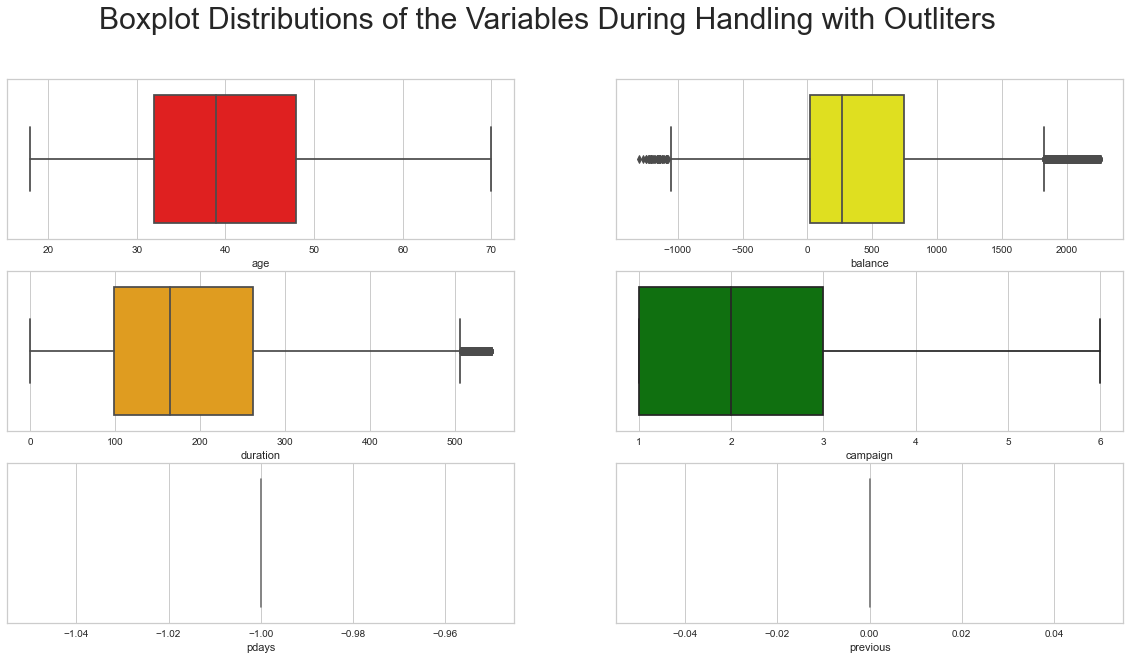

In [242]:
# Detect Outliers
# I using Box Plot to detect Outliers in the dataset
fig,axes = plt.subplots(3,2,figsize=(20, 10), sharey=True)
fig.suptitle('Boxplot Distributions of the Variables During Handling with Outliters',fontsize=30)

sns.boxplot(ax=axes[0,0], x='age',color='red', data=df)
sns.boxplot(ax=axes[0,1], x='balance',color='yellow'  , data=df) 
sns.boxplot(ax=axes[1,0], x='duration' , color='orange' , data=df)
sns.boxplot(ax=axes[1,1], x='campaign' , color='green' ,   data=df)
sns.boxplot(ax=axes[2,0], x='pdays' ,color='pink' ,   data=df)
sns.boxplot(ax=axes[2,1], x='previous' ,color='pink' ,   data=df);

In [243]:
cols = [ 'duration' ,'balance','age'] # The columns you want to search for outliers in

# Calculate quantiles and IQR
Q1 = df[cols].quantile(0.25) # Same as np.percentile but maps (0,1) and not (0,100)
Q3 = df[cols].quantile(0.75)
IQR = Q3 - Q1

# Return a boolean array of the rows with (any) non-outlier column values
condition = ~((df[cols] < (Q1 - 1.5 * IQR)) | (df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)

# Filter our dataframe based on condition
df = df[condition]

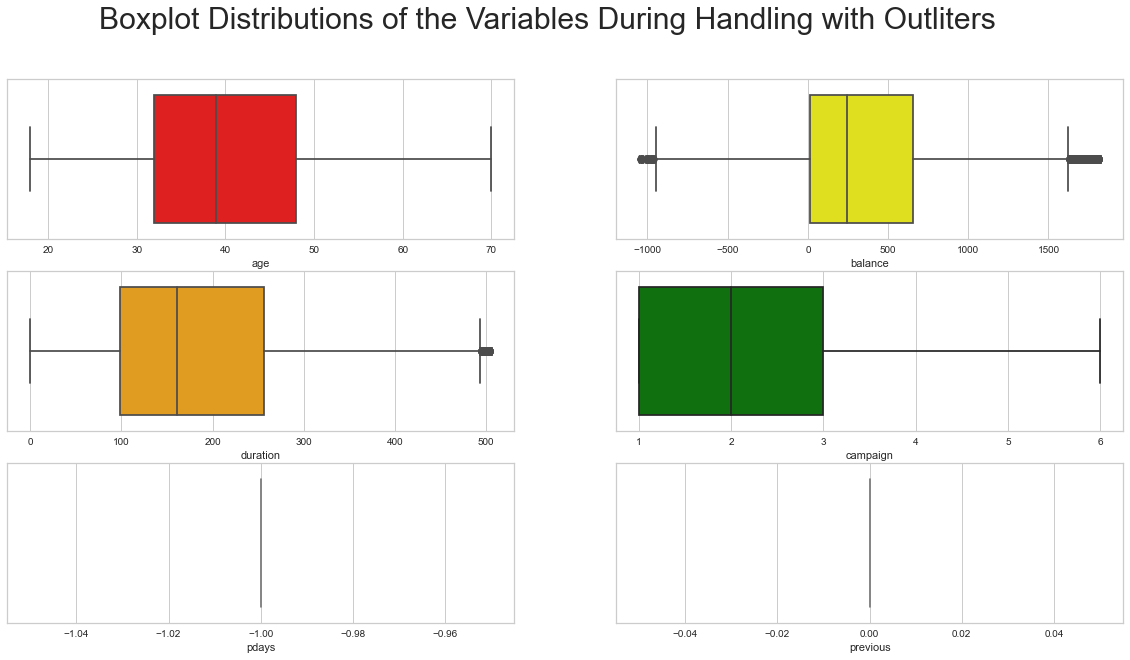

In [244]:
# Detect Outliers
# I using Box Plot to detect Outliers in the dataset
fig,axes = plt.subplots(3,2,figsize=(20, 10), sharey=True)
fig.suptitle('Boxplot Distributions of the Variables During Handling with Outliters',fontsize=30)

sns.boxplot(ax=axes[0,0], x='age',color='red', data=df)
sns.boxplot(ax=axes[0,1], x='balance',color='yellow'  , data=df) 
sns.boxplot(ax=axes[1,0], x='duration' , color='orange' , data=df)
sns.boxplot(ax=axes[1,1], x='campaign' , color='green' ,   data=df)
sns.boxplot(ax=axes[2,0], x='pdays' ,color='pink' ,   data=df)
sns.boxplot(ax=axes[2,1], x='previous' ,color='pink' ,   data=df);

In [245]:
cols = [ 'duration' ,'balance','age'] # The columns you want to search for outliers in

# Calculate quantiles and IQR
Q1 = df[cols].quantile(0.25) # Same as np.percentile but maps (0,1) and not (0,100)
Q3 = df[cols].quantile(0.75)
IQR = Q3 - Q1

# Return a boolean array of the rows with (any) non-outlier column values
condition = ~((df[cols] < (Q1 - 1.5 * IQR)) | (df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)

# Filter our dataframe based on condition
df = df[condition]

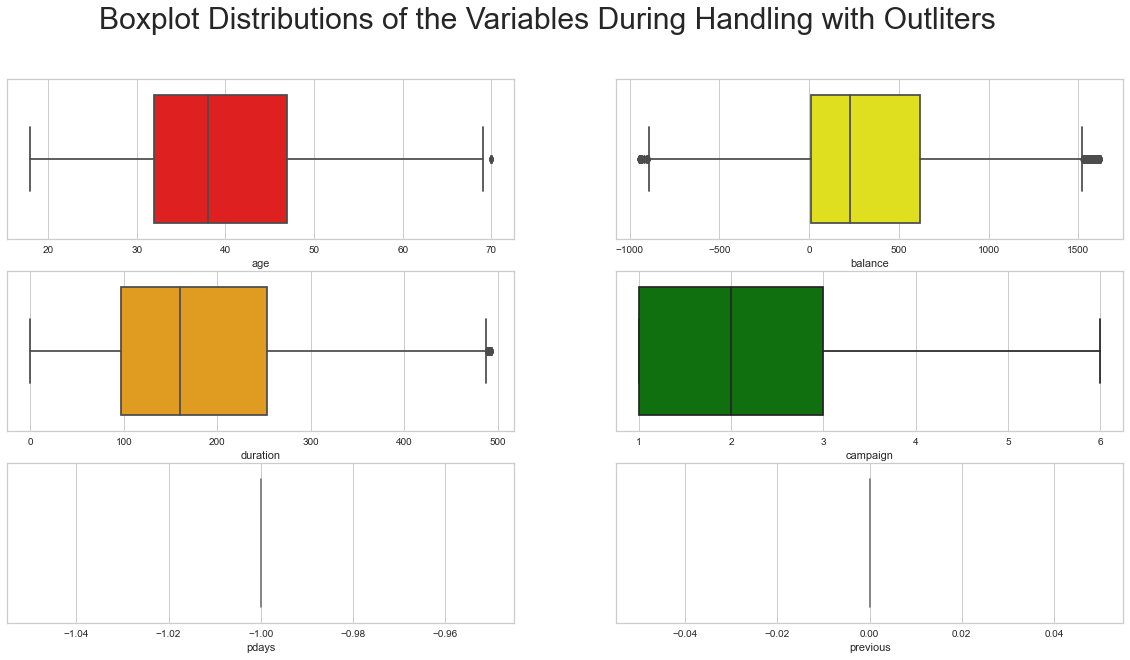

In [246]:
# Detect Outliers
# I using Box Plot to detect Outliers in the dataset
fig,axes = plt.subplots(3,2,figsize=(20, 10), sharey=True)
fig.suptitle('Boxplot Distributions of the Variables During Handling with Outliters',fontsize=30)

sns.boxplot(ax=axes[0,0], x='age',color='red', data=df)
sns.boxplot(ax=axes[0,1], x='balance',color='yellow'  , data=df) 
sns.boxplot(ax=axes[1,0], x='duration' , color='orange' , data=df)
sns.boxplot(ax=axes[1,1], x='campaign' , color='green' ,   data=df)
sns.boxplot(ax=axes[2,0], x='pdays' ,color='pink' ,   data=df)
sns.boxplot(ax=axes[2,1], x='previous' ,color='pink' ,   data=df);

In [247]:
cols = [ 'duration' ,'balance','age'] # The columns you want to search for outliers in

# Calculate quantiles and IQR
Q1 = df[cols].quantile(0.25) # Same as np.percentile but maps (0,1) and not (0,100)
Q3 = df[cols].quantile(0.75)
IQR = Q3 - Q1

# Return a boolean array of the rows with (any) non-outlier column values
condition = ~((df[cols] < (Q1 - 1.5 * IQR)) | (df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)

# Filter our dataframe based on condition
df = df[condition]

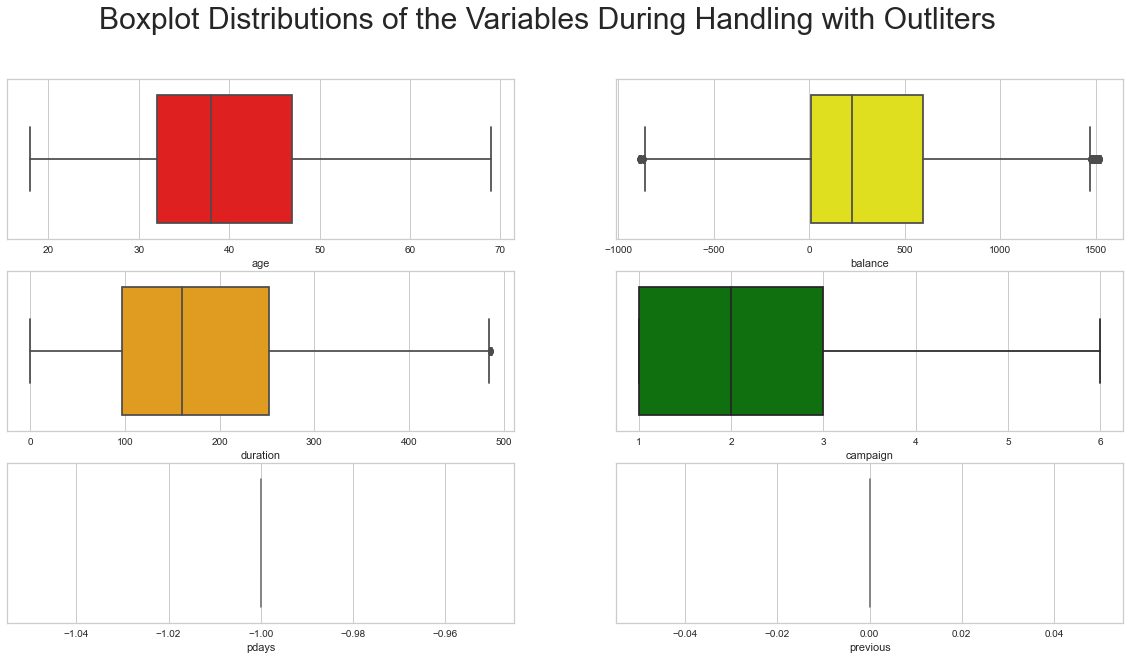

In [248]:
# Detect Outliers
# I using Box Plot to detect Outliers in the dataset
fig,axes = plt.subplots(3,2,figsize=(20, 10), sharey=True)
fig.suptitle('Boxplot Distributions of the Variables During Handling with Outliters',fontsize=30)

sns.boxplot(ax=axes[0,0], x='age',color='red', data=df)
sns.boxplot(ax=axes[0,1], x='balance',color='yellow'  , data=df) 
sns.boxplot(ax=axes[1,0], x='duration' , color='orange' , data=df)
sns.boxplot(ax=axes[1,1], x='campaign' , color='green' ,   data=df)
sns.boxplot(ax=axes[2,0], x='pdays' ,color='pink' ,   data=df)
sns.boxplot(ax=axes[2,1], x='previous' ,color='pink' ,   data=df);

In [249]:
cols = [ 'duration' ,'balance','age'] # The columns you want to search for outliers in

# Calculate quantiles and IQR
Q1 = df[cols].quantile(0.25) # Same as np.percentile but maps (0,1) and not (0,100)
Q3 = df[cols].quantile(0.75)
IQR = Q3 - Q1

# Return a boolean array of the rows with (any) non-outlier column values
condition = ~((df[cols] < (Q1 - 1.5 * IQR)) | (df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)

# Filter our dataframe based on condition
df = df[condition]

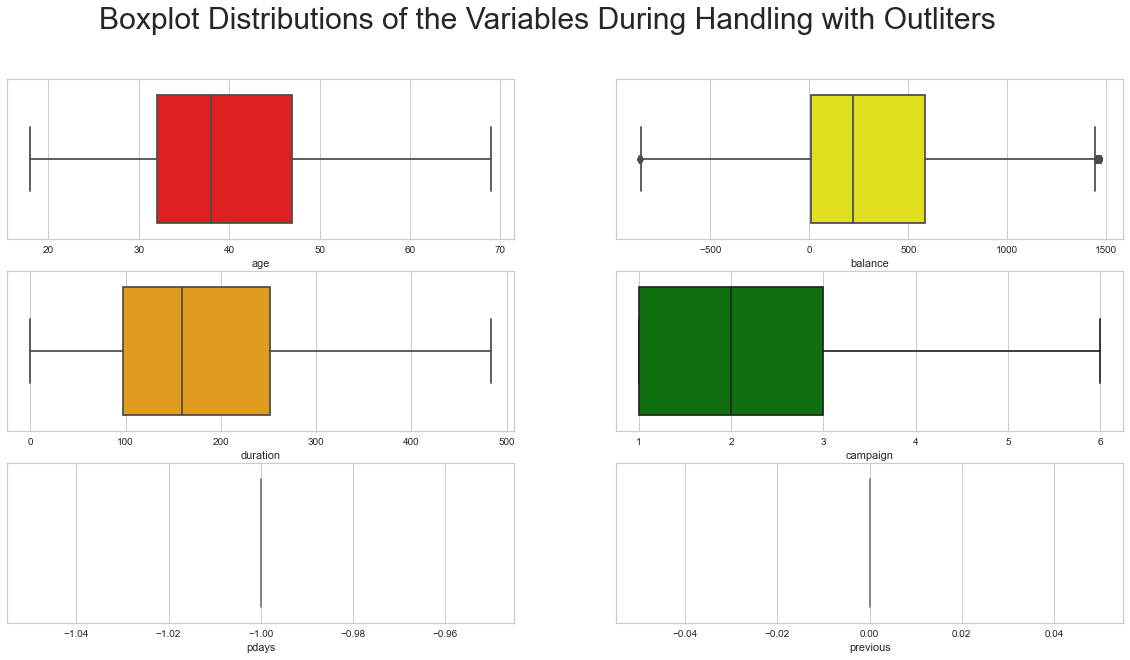

In [250]:
# Detect Outliers
# I using Box Plot to detect Outliers in the dataset
fig,axes = plt.subplots(3,2,figsize=(20, 10), sharey=True)
fig.suptitle('Boxplot Distributions of the Variables During Handling with Outliters',fontsize=30)

sns.boxplot(ax=axes[0,0], x='age',color='red', data=df)
sns.boxplot(ax=axes[0,1], x='balance',color='yellow'  , data=df) 
sns.boxplot(ax=axes[1,0], x='duration' , color='orange' , data=df)
sns.boxplot(ax=axes[1,1], x='campaign' , color='green' ,   data=df)
sns.boxplot(ax=axes[2,0], x='pdays' ,color='pink' ,   data=df)
sns.boxplot(ax=axes[2,1], x='previous' ,color='pink' ,   data=df);

In [251]:
cols = [ 'duration' ,'balance','age'] # The columns you want to search for outliers in

# Calculate quantiles and IQR
Q1 = df[cols].quantile(0.25) # Same as np.percentile but maps (0,1) and not (0,100)
Q3 = df[cols].quantile(0.75)
IQR = Q3 - Q1

# Return a boolean array of the rows with (any) non-outlier column values
condition = ~((df[cols] < (Q1 - 1.5 * IQR)) | (df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)

# Filter our dataframe based on condition
df = df[condition]

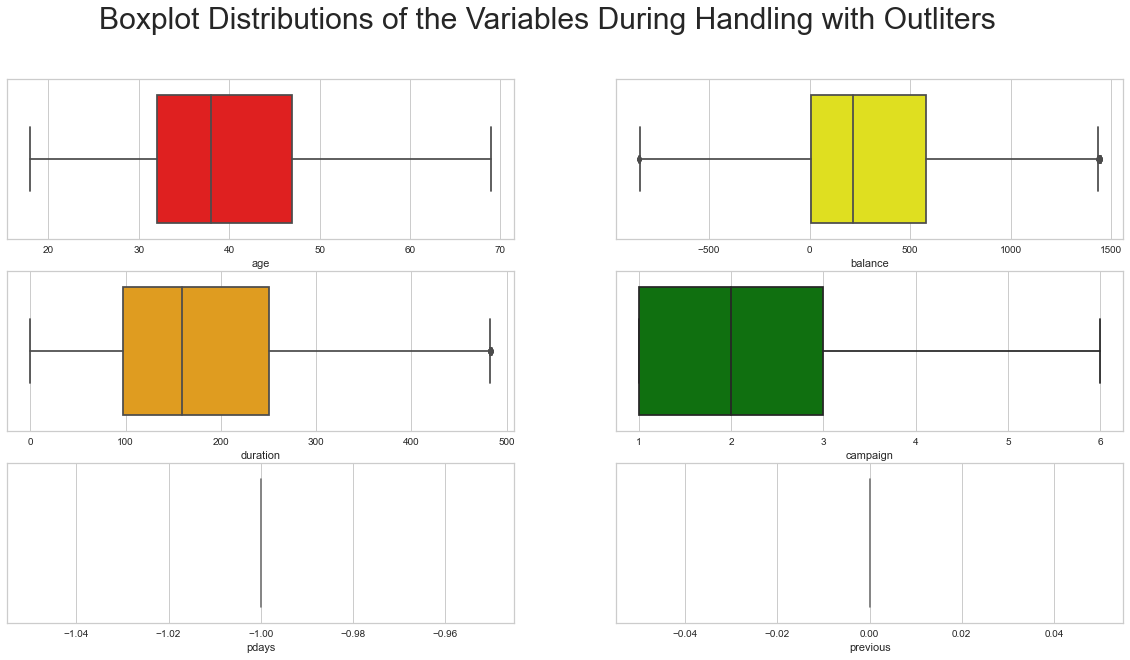

In [252]:
# Detect Outliers
# I using Box Plot to detect Outliers in the dataset
fig,axes = plt.subplots(3,2,figsize=(20, 10), sharey=True)
fig.suptitle('Boxplot Distributions of the Variables During Handling with Outliters',fontsize=30)

sns.boxplot(ax=axes[0,0], x='age',color='red', data=df)
sns.boxplot(ax=axes[0,1], x='balance',color='yellow'  , data=df) 
sns.boxplot(ax=axes[1,0], x='duration' , color='orange' , data=df)
sns.boxplot(ax=axes[1,1], x='campaign' , color='green' ,   data=df)
sns.boxplot(ax=axes[2,0], x='pdays' ,color='pink' ,   data=df)
sns.boxplot(ax=axes[2,1], x='previous' ,color='pink' ,   data=df);

In [253]:
cols = [ 'duration' ,'balance','age'] # The columns you want to search for outliers in

# Calculate quantiles and IQR
Q1 = df[cols].quantile(0.25) # Same as np.percentile but maps (0,1) and not (0,100)
Q3 = df[cols].quantile(0.75)
IQR = Q3 - Q1

# Return a boolean array of the rows with (any) non-outlier column values
condition = ~((df[cols] < (Q1 - 1.5 * IQR)) | (df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)

# Filter our dataframe based on condition
df = df[condition]

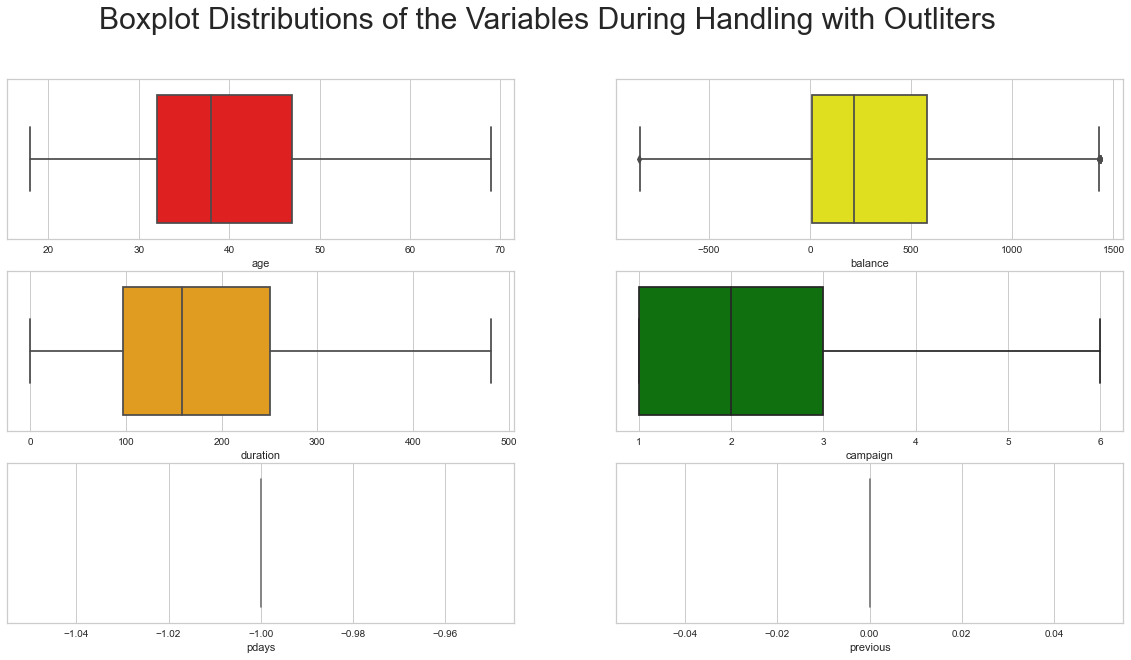

In [254]:
# Detect Outliers
# I using Box Plot to detect Outliers in the dataset
fig,axes = plt.subplots(3,2,figsize=(20, 10), sharey=True)
fig.suptitle('Boxplot Distributions of the Variables During Handling with Outliters',fontsize=30)

sns.boxplot(ax=axes[0,0], x='age',color='red', data=df)
sns.boxplot(ax=axes[0,1], x='balance',color='yellow'  , data=df) 
sns.boxplot(ax=axes[1,0], x='duration' , color='orange' , data=df)
sns.boxplot(ax=axes[1,1], x='campaign' , color='green' ,   data=df)
sns.boxplot(ax=axes[2,0], x='pdays' ,color='pink' ,   data=df)
sns.boxplot(ax=axes[2,1], x='previous' ,color='pink' ,   data=df);

In [255]:
cols = [ 'duration' ,'balance','age'] # The columns you want to search for outliers in

# Calculate quantiles and IQR
Q1 = df[cols].quantile(0.25) # Same as np.percentile but maps (0,1) and not (0,100)
Q3 = df[cols].quantile(0.75)
IQR = Q3 - Q1

# Return a boolean array of the rows with (any) non-outlier column values
condition = ~((df[cols] < (Q1 - 1.5 * IQR)) | (df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)

# Filter our dataframe based on condition
df = df[condition]

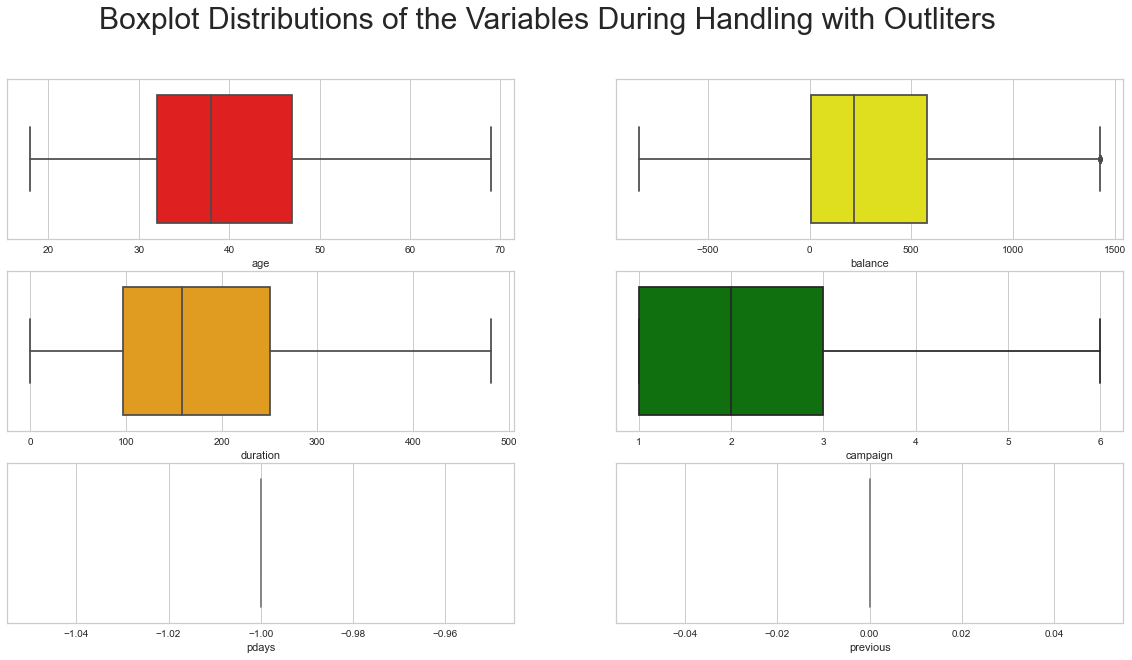

In [256]:
# Detect Outliers
# I using Box Plot to detect Outliers in the dataset
fig,axes = plt.subplots(3,2,figsize=(20, 10), sharey=True)
fig.suptitle('Boxplot Distributions of the Variables During Handling with Outliters',fontsize=30)

sns.boxplot(ax=axes[0,0], x='age',color='red', data=df)
sns.boxplot(ax=axes[0,1], x='balance',color='yellow'  , data=df) 
sns.boxplot(ax=axes[1,0], x='duration' , color='orange' , data=df)
sns.boxplot(ax=axes[1,1], x='campaign' , color='green' ,   data=df)
sns.boxplot(ax=axes[2,0], x='pdays' ,color='pink' ,   data=df)
sns.boxplot(ax=axes[2,1], x='previous' ,color='pink' ,   data=df);

In [257]:
cols = [ 'duration' ,'balance','age'] # The columns you want to search for outliers in

# Calculate quantiles and IQR
Q1 = df[cols].quantile(0.25) # Same as np.percentile but maps (0,1) and not (0,100)
Q3 = df[cols].quantile(0.75)
IQR = Q3 - Q1

# Return a boolean array of the rows with (any) non-outlier column values
condition = ~((df[cols] < (Q1 - 1.5 * IQR)) | (df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)

# Filter our dataframe based on condition
df = df[condition]

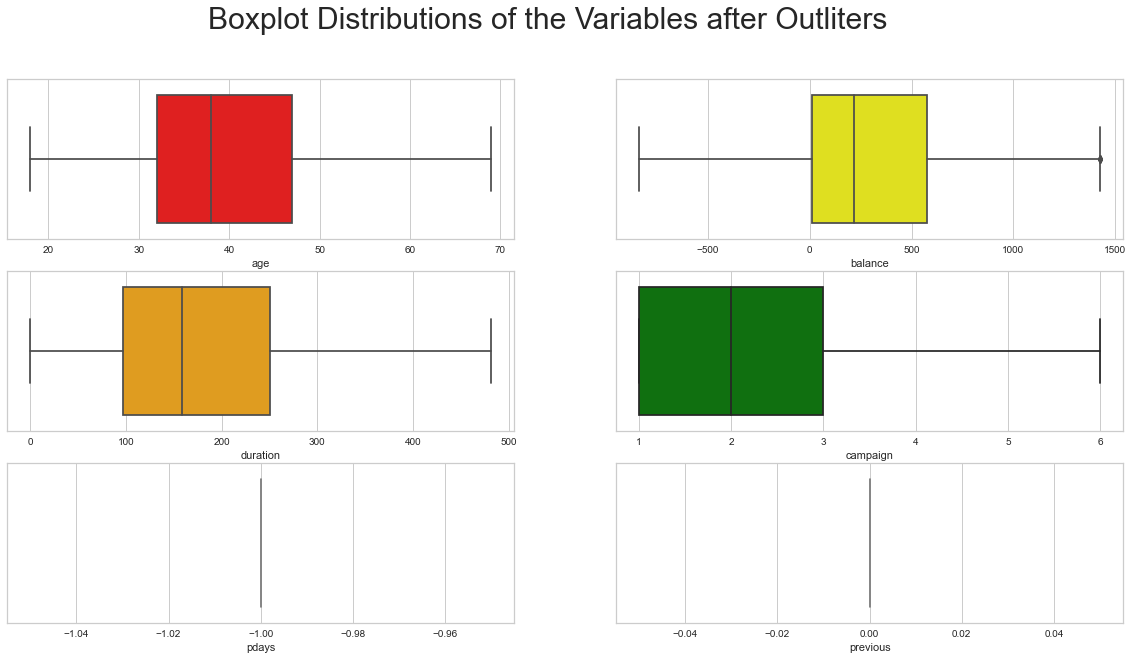

In [258]:
# Detect Outliers
# I using Box Plot to detect Outliers in the dataset
fig,axes = plt.subplots(3,2,figsize=(20, 10), sharey=True)
fig.suptitle('Boxplot Distributions of the Variables after Outliters',fontsize=30)

sns.boxplot(ax=axes[0,0], x='age',color='red', data=df)
sns.boxplot(ax=axes[0,1], x='balance',color='yellow'  , data=df) 
sns.boxplot(ax=axes[1,0], x='duration' , color='orange' , data=df)
sns.boxplot(ax=axes[1,1], x='campaign' , color='green' ,   data=df)
sns.boxplot(ax=axes[2,0], x='pdays' ,color='pink' ,   data=df)
sns.boxplot(ax=axes[2,1], x='previous' ,color='pink' ,   data=df);

##### Summary

- In this stage, I doing many steps 
- Load Libraries and dataset.
- Know the basic information about data by using the same function scuh as head, shape , dtypes , info , describe 
- Checking on missing values
- Checking on duplicates values
- Detecting outliters

<hr>

### 3. Exploratory Data Analysis (EDA)

#### 3.1. What's the jobs for bank clients?

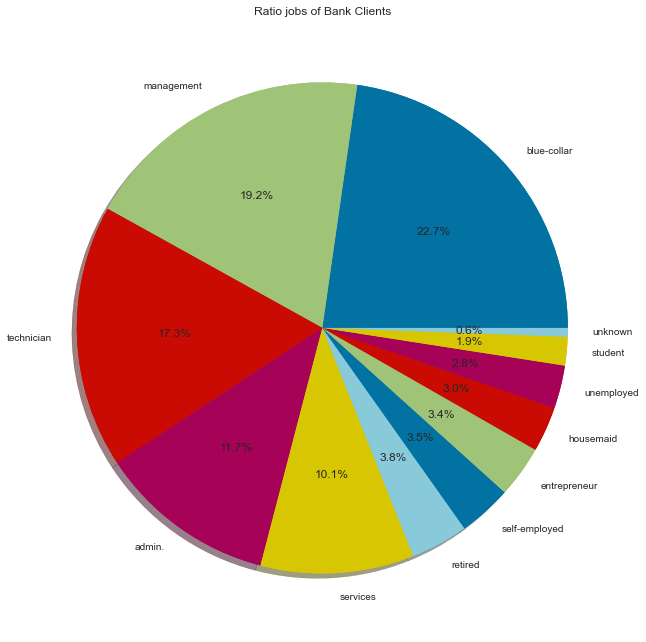

In [259]:
#  jobs
series = df['job'].value_counts()

labels = series.index
values = series.values

# Figure size
plt.figure(figsize=(11,15))

plt.pie(values) 

# Figure title
plt.title('Ratio jobs of Bank Clients')
# plot
plt.pie(values, labels = labels, shadow = True, autopct = '%1.1f%%');

#### 3.2. What is the marital status of bank clients?

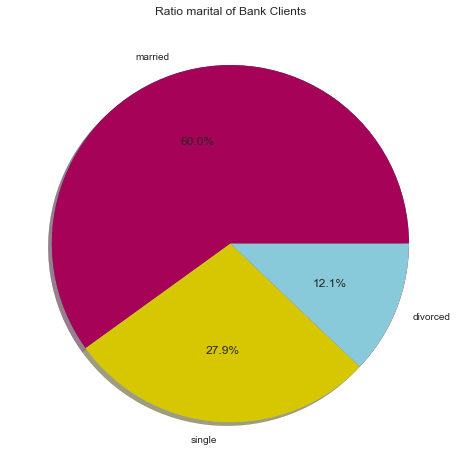

In [260]:
#  marital
series = df['marital'].value_counts()

labels = series.index
values = series.values

# Figure size
plt.figure(figsize=(8,10))

plt.pie(values) 

# Figure title
plt.title('Ratio marital of Bank Clients')
# plot
plt.pie(values, labels = labels, shadow = True, autopct = '%1.1f%%');

#### 3.3. What is the education status of bank clients?

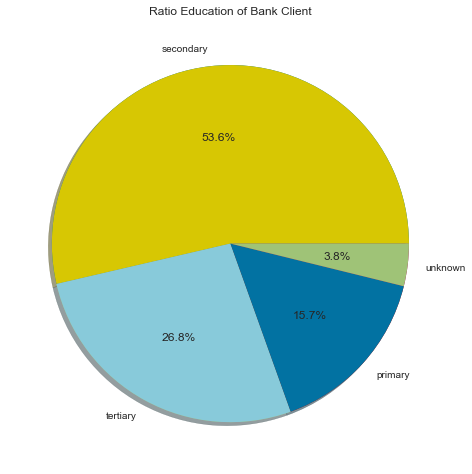

In [261]:
# education
series = df['education'].value_counts()

labels = series.index
values = series.values

# Figure size
plt.figure(figsize=(8,10))

plt.pie(values) 

# Figure title
plt.title('Ratio Education of Bank Client')
# plot
plt.pie(values, labels = labels, shadow = True, autopct = '%1.1f%%');

#### 3.4. Are bank clients have credit cards?

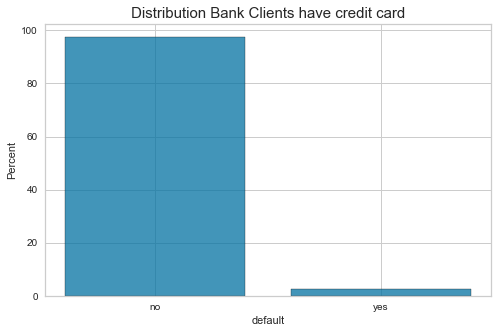

In [262]:
# default

# Figure size
plt.figure(figsize=(8,5))

# Figure title
plt.title(" Distribution Bank Clients have credit card ", loc="center",fontsize='15')

# plot
sns.histplot(data= df, x="default" , common_norm=False,shrink=.8,multiple="dodge",stat='percent')

# Figure show
plt.show()

#### 3.5. Are bank clients have housing loans?

In [263]:
housing_df = df.groupby(["housing"])\
.count()["month"]

housing_df.head()

housing
no     10754
yes    13733
Name: month, dtype: int64

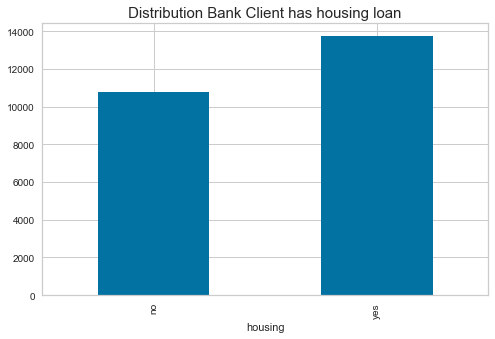

In [264]:
# plot
housing_df.plot(kind='bar',figsize=(8,5))

#plot title
plt.title(" Distribution Bank Client has housing loan ",fontsize="15");

#### 3.6. Are bank clients have personal loans?

In [265]:
loan_df = df.groupby(["loan"])\
.count()["month"]

loan_df.head()

loan
no     20014
yes     4473
Name: month, dtype: int64

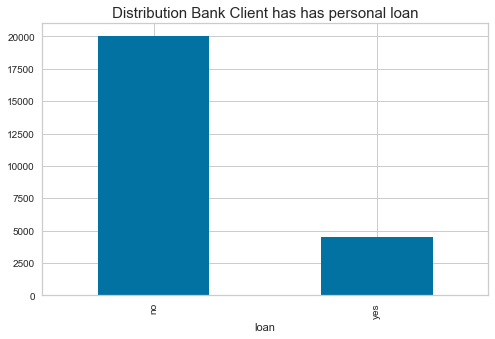

In [266]:
# plot
loan_df.plot(kind='bar',figsize=(8,5))

#plot title
plt.title(" Distribution Bank Client has has personal loan ",fontsize="15");

#### 3.7. what's the method contact with bank clients?

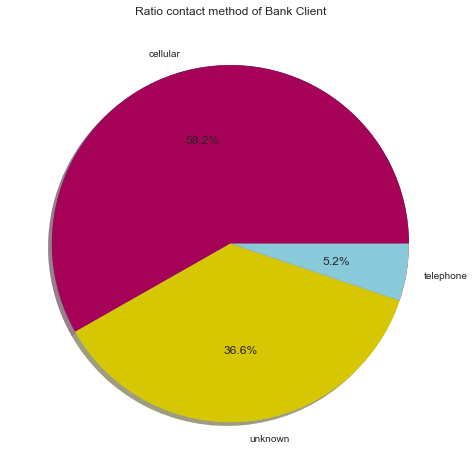

In [267]:
# contact
series = df['contact'].value_counts()

labels = series.index
values = series.values

# Figure size
plt.figure(figsize=(8,10))

plt.pie(values) 

# Figure title
plt.title('Ratio contact method of Bank Client')

#plot
plt.pie(values, labels = labels, shadow = True, autopct = '%1.1f%%');

#### 3.8. what's the last contact month of the year of bank clients?

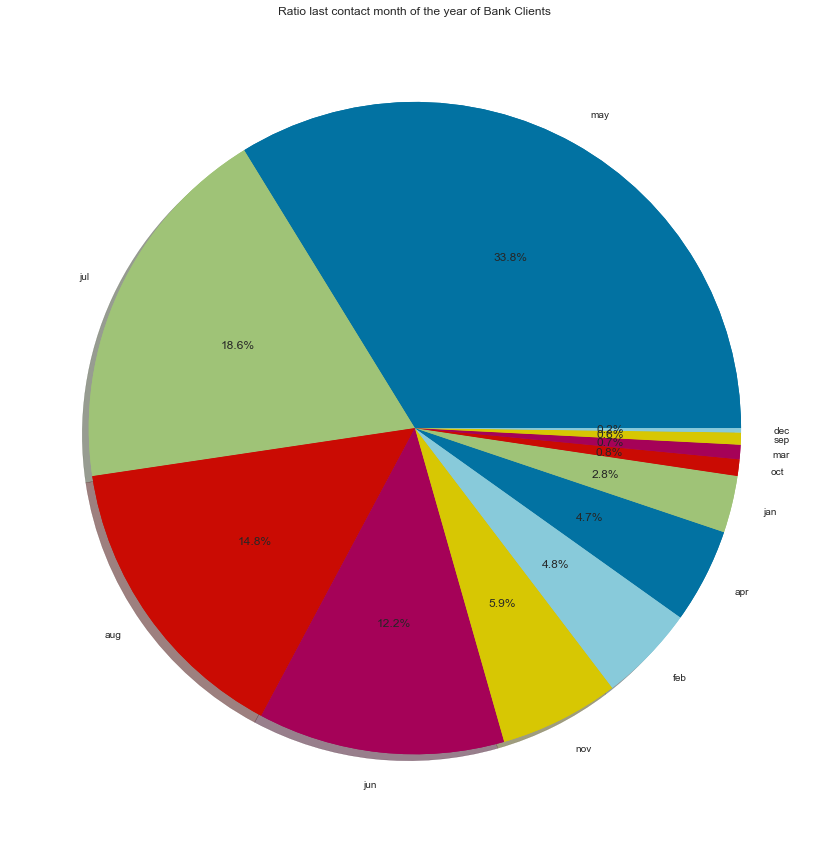

In [268]:
# contact
series = df['month'].value_counts()

labels = series.index
values = series.values

# Figure size
plt.figure(figsize=(15,15))

plt.pie(values) 

# Figure title
plt.title('Ratio last contact month of the year of Bank Clients')

#plot
plt.pie(values, labels = labels, shadow = True, autopct = '%1.1f%%');

#### 3.9. Do clients subscribe to a term deposit based on the last contact duration (in seconds)?

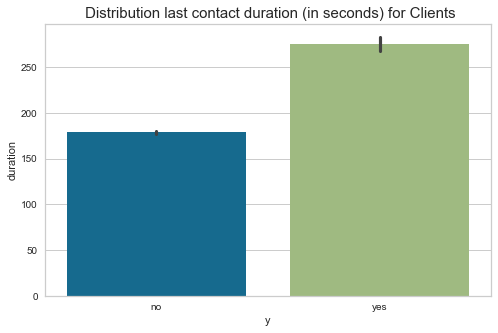

In [269]:
# Duration 

# Figure size
plt.figure(figsize=(8,5))

# Figure title
plt.title(" Distribution last contact duration (in seconds) for Clients", loc="center",fontsize='15')

#plot
sns.barplot(data= df, x="y" ,y="duration")

# Figure show
plt.show()

#### 3.10. what's the method of contact performed during this campaign by contacting?

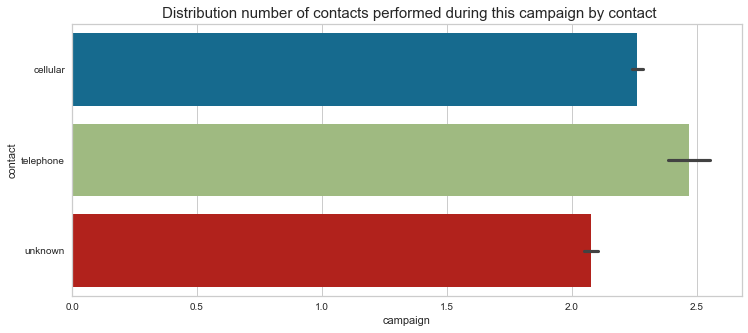

In [270]:
# campign

# Figure size
plt.figure(figsize=(12,5))

# Figure title
plt.title(" Distribution number of contacts performed during this campaign by contact", loc="center",fontsize='15')

#plot
sns.barplot(data= df, x="campaign",y='contact')

# Figure show
plt.show()

#### 3.11. what's the highest and lowest month number of a contact in the campaign?

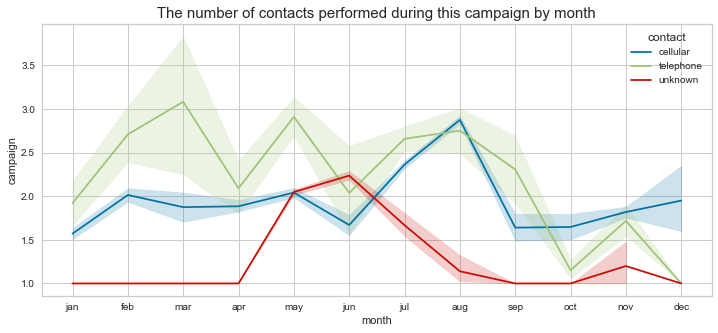

In [271]:
# Figure size
plt.figure(figsize=(12,5))

#figure title
plt.title(" The number of contacts performed during this campaign by month ", loc="center",fontsize='15')

#plot
sns.lineplot(data= df, x='month' , y="campaign" , hue='contact')

# show plot
plt.show()

### 3.12. what's the last contact duration performed during this campaign by month?

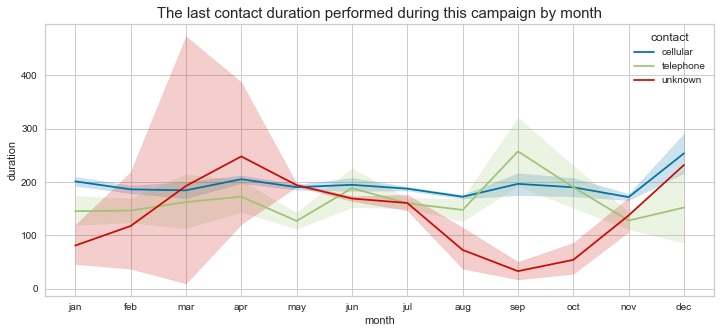

In [272]:
# Figure size
plt.figure(figsize=(12,5))

#figure title
plt.title(" The last contact duration performed during this campaign by month ", loc="center",fontsize='15')

#plot
sns.lineplot(data= df, x='month' , y="duration" , hue='contact')

# show plot
plt.show()

### 3.13 Distribution campaign by jobs based on  clients have credit card 

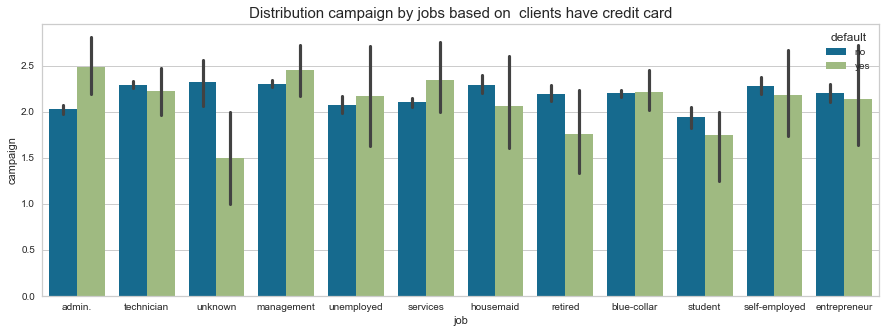

In [273]:
# Figure size
plt.figure(figsize=(15,5))

#figure title
plt.title(" Distribution campaign by jobs based on  clients have credit card ", loc="center",fontsize='15')

#plot
sns.barplot(data= df, x="job" , y="campaign" , hue='default')

# show plot
plt.show()

#### 3.14. Distribution duration by month based on y

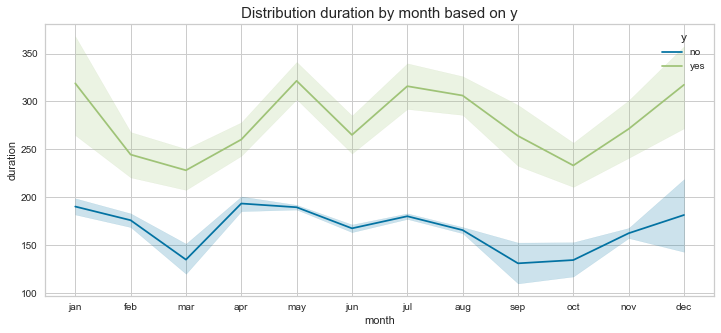

In [274]:
# Figure size
plt.figure(figsize=(12,5))

#figure title
plt.title(" Distribution duration by month based on y ", loc="center",fontsize='15')

#plot
sns.lineplot(data= df, x='month' , y="duration" , hue='y')

# show plot
plt.show()

##### Summary

- <b>In this stage, I have these results</b>
- The top 5 jobs for the client's bank: blue-collar (22.5%), management (19.9%),technician (17.1%), admin (11.5%), and services (9.7%)<br>
  The lowest 5 jobs for the client's bank: self-employed (3.4%),unemployed (2.9%),housemaid (2.9%),student (1.9%), and unknown (0.6%).
- The ratio marital of bank clients divide to 3 types married(60.3%), single(27.8%), and divorced(11.9%).
- The ratio education of bank clients divide to 4 types Secondary(52.8%), tereiary(27.7%), married(15.6%), and unkmown(3.9%).
- The ratio bank clients have cridet card (98% no) and (2% yes).
- The number of clients that have housing loans (55.51% yes) and (44.49% no).
- The number of clients that have personal loans (17.50 % yes) and (82.50% no).
- The ratio contact method of Bank Client 3 types cellular(58.5%), unknown(36.2%), and telephone(15.6%).
- The ratio last contact month of year of Bank Clients.
- The top 5 months active Ratio last contact month of the year of Bank Clients: may (32.7%), Jul (18.0%), Aug (14.4%), Jun (13.1%), and Nov (6.8%) <br>
  The lowest 5 months active Ratio last contact month of the year of Bank Clients: Jan (2.8%), Oct (1.0%),Mar (0.8%),Sep (0.7%), and Dec (0.2%).
- The number of Clients who accept the campaign in the last contact duration (in seconds) is higher than the rejected.
- The number of contacts performed during this campaign sorted from top to down telephone, cellular and unknown.
- The number of contacts performed during this campaign by month sorted from top to down telephone, cellular and unknown.
- The clients that have credit cards more than they not based on jobs. 
- The distribution duration by month based on y  who accept is higher than rejected.

<hr>

### 4. Data Preparation


In [275]:
#check on missing data
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [276]:
# check on data types of data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24487 entries, 2 to 49723
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        24487 non-null  int64 
 1   job        24487 non-null  object
 2   marital    24487 non-null  object
 3   education  24487 non-null  object
 4   default    24487 non-null  object
 5   balance    24487 non-null  int64 
 6   housing    24487 non-null  object
 7   loan       24487 non-null  object
 8   contact    24487 non-null  object
 9   day        24487 non-null  int64 
 10  month      24487 non-null  object
 11  duration   24487 non-null  int64 
 12  campaign   24487 non-null  int64 
 13  pdays      24487 non-null  int64 
 14  previous   24487 non-null  int64 
 15  poutcome   24487 non-null  object
 16  y          24487 non-null  object
dtypes: int64(7), object(10)
memory usage: 3.9+ MB


In [277]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
2,28,admin.,married,tertiary,no,654,no,no,cellular,28,jan,198,1,-1,0,unknown,no
3,46,technician,married,tertiary,no,0,yes,no,cellular,28,jan,58,1,-1,0,unknown,no
4,54,technician,married,secondary,no,1076,no,no,cellular,28,jan,338,1,-1,0,unknown,no
5,53,unknown,married,unknown,no,13,no,no,telephone,28,jan,69,1,-1,0,unknown,no
6,29,management,married,tertiary,no,805,no,no,cellular,28,jan,70,1,-1,0,unknown,no


#### 4.1. Label encoding for column default

In [278]:
df['default'].unique()

array(['no', 'yes'], dtype=object)

In [279]:
# label_encoder object knows how to understand word labels.
le_default = LabelEncoder()

# Encode labels in column 'default'.
df['default']= le_default.fit_transform(df['default'])

df['default'].unique()

array([0, 1])

#### 4.2. Label encoding for column housing

In [280]:
df['housing'].unique()

array(['no', 'yes'], dtype=object)

In [281]:
# label_encoder object knows how to understand word labels.
le_housing = LabelEncoder()

# Encode labels in column 'housing'.
df['housing']= le_housing.fit_transform(df['housing'])

df['housing'].unique()

array([0, 1])

#### 4.3. Label encoding for column loan

In [282]:
df['loan'].unique()

array(['no', 'yes'], dtype=object)

In [283]:
# label_encoder object knows how to understand word labels.
le_loan = LabelEncoder()

# Encode labels in column 'loan'.
df['loan']= le_loan.fit_transform(df['loan'])

df['loan'].unique()

array([0, 1])

#### 4.4. Label encoding for column month

In [284]:
df['month'].unique()

array(['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep',
       'oct', 'nov', 'dec'], dtype=object)

In [285]:
# label_encoder object knows how to understand word labels.
le_month = LabelEncoder()

# Encode labels in column 'month'.
df['month']= le_month.fit_transform(df['month'])

df['month'].unique()

array([ 4,  3,  7,  0,  8,  6,  5,  1, 11, 10,  9,  2])

#### 4.5. Label encoding for column poutcome

In [286]:
df['poutcome'].unique()

array(['unknown'], dtype=object)

In [287]:
# label_encoder object knows how to understand word labels.
le_poutcome = LabelEncoder()

# Encode labels in column 'poutcome'.
df['poutcome']= le_poutcome.fit_transform(df['poutcome'])

df['poutcome'].unique()

array([0])

#### 4.6. Label encoding for column y

In [288]:
df['y'].unique()

array(['no', 'yes'], dtype=object)

In [289]:
# label_encoder object knows how to understand word labels.
le_y = LabelEncoder()

# Encode labels in column 'y'.
df['y']= le_y.fit_transform(df['y'])

df['y'].unique()

array([0, 1])

In [290]:
# rename column y to result   
df.rename(columns = {'y':'result'}, inplace = True)

#### 4.7. One hot encoding for column job

In [291]:
df_job=pd.get_dummies(df['job'],drop_first=False)

In [292]:
df=pd.concat([df_job,df],axis=1)

In [293]:
df.drop(['job'], axis=1, inplace=True)

In [294]:
# rename column unknown to unknown job 
df.rename(columns = {'unknown':'unknown job'}, inplace = True)

#### 4.8. One hot encoding for column marital

In [295]:
df_marital=pd.get_dummies(df['marital'],drop_first=False)

In [296]:
df=pd.concat([df_marital,df],axis=1)

In [297]:
df.drop(['marital'], axis=1, inplace=True)

#### 4.9. One hot encoding for column education

In [298]:
df_education=pd.get_dummies(df['education'],drop_first=False)

In [299]:
df=pd.concat([df_education,df],axis=1)

In [300]:
df.drop(['education'], axis=1, inplace=True)

In [301]:
# rename column unknown to unknown education 
df.rename(columns = {'unknown':'unknown education'}, inplace = True)

#### 4.10. One hot encoding for column contact

In [302]:
df_contact=pd.get_dummies(df['contact'],drop_first=False)

In [303]:
df=pd.concat([df_contact,df],axis=1)

In [304]:
df.drop(['contact'], axis=1, inplace=True)

In [305]:
# rename column unknown to unknown contact 
df.rename(columns = {'unknown':'unknown contact'}, inplace = True)

#### 4.11. PCA 

##### Spilt Data to X and Y 

In [306]:
# Save X data
#X Save columns it have index from 8 to 20 and column index 23
X = df.iloc[:, np.r_[0:33]]
# y is target of data
y = df['result']

In [307]:
# To show columns in X
X

,cellular,telephone,unknown contact,primary,secondary,tertiary,unknown education,divorced,married,single,...,default,balance,housing,loan,day,month,duration,campaign,pdays,previous
2,1,0,0,0,0,1,0,0,1,0,...,0,654,0,0,28,4,198,1,-1,0
3,1,0,0,0,0,1,0,0,1,0,...,0,0,1,0,28,4,58,1,-1,0
4,1,0,0,0,1,0,0,0,1,0,...,0,1076,0,0,28,4,338,1,-1,0
5,0,1,0,0,0,0,1,0,1,0,...,0,13,0,0,28,4,69,1,-1,0
6,1,0,0,0,0,1,0,0,1,0,...,0,805,0,0,28,4,70,1,-1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49696,1,0,0,0,0,0,1,0,0,1,...,0,755,0,0,29,2,284,1,-1,0
49701,1,0,0,0,0,1,0,0,0,1,...,0,916,0,0,29,2,449,2,-1,0
49708,1,0,0,0,0,1,0,1,0,0,...,0,461,0,0,30,2,369,2,-1,0
49719,1,0,0,1,0,0,0,0,1,0,...,0,980,1,0,3,2,352,1,-1,0


In [308]:
# To show the target
y

2        0
3        0
4        0
5        0
6        0
        ..
49696    1
49701    1
49708    1
49719    1
49723    0
Name: result, Length: 24487, dtype: int32

In [309]:
# Instantiate Standard Scaler
scaler = StandardScaler()

# Fit & transform data
scaled_df = scaler.fit_transform(X)

In [310]:
# Apply PCA
# Select number of Components for pca 
# Use number of column in X
pca = PCA(n_components=33)

## Fit Scaled_df 
pcs = pca.fit_transform(scaled_df)

In [311]:
pcs

array([[ 1.83575452e+00,  2.01363738e-01, -1.15921784e-01, ...,
         3.42243198e-15, -1.41346125e-18, -4.07035702e-19],
       [ 1.50014708e+00,  8.62225929e-01, -1.37142338e-01, ...,
        -3.35357643e-14,  1.61435173e-17,  1.17073058e-18],
       [ 7.63114970e-01,  5.83368974e-01, -2.33625091e+00, ...,
        -3.15135621e-14, -1.05055565e-16, -9.99393361e-17],
       ...,
       [ 3.21128990e+00,  7.93679987e-01,  9.96087314e-01, ...,
        -1.47461812e-15, -9.70734920e-18, -1.92870652e-18],
       [ 9.26916717e-02,  2.20627750e+00, -6.35119028e-01, ...,
         7.23625431e-16,  3.69871790e-18,  5.99577151e-18],
       [ 3.59639349e+00, -8.19365353e-01,  1.84279238e+00, ...,
        -8.73794547e-16, -2.07793836e-18, -1.82894435e-18]])

#### 4.12. Varinace Ratio

In [312]:
# Get varinace ratio for each of columns
pd.Series(pca.explained_variance_ratio_) 

0     9.251129e-02
1     7.778908e-02
2     6.677565e-02
3     5.002486e-02
4     4.716002e-02
5     4.308604e-02
6     3.974440e-02
7     3.847374e-02
8     3.792017e-02
9     3.628314e-02
10    3.544693e-02
11    3.418842e-02
12    3.373226e-02
13    3.344426e-02
14    3.323931e-02
15    3.206315e-02
16    3.060297e-02
17    3.025379e-02
18    2.942515e-02
19    2.826117e-02
20    2.720424e-02
21    2.647484e-02
22    2.498898e-02
23    2.383935e-02
24    1.737148e-02
25    1.606576e-02
26    1.362959e-02
27    1.504838e-28
28    8.384451e-29
29    1.679597e-29
30    1.675872e-29
31    5.048539e-34
32    5.048539e-34
dtype: float64

#### 4.13. Scree Plot

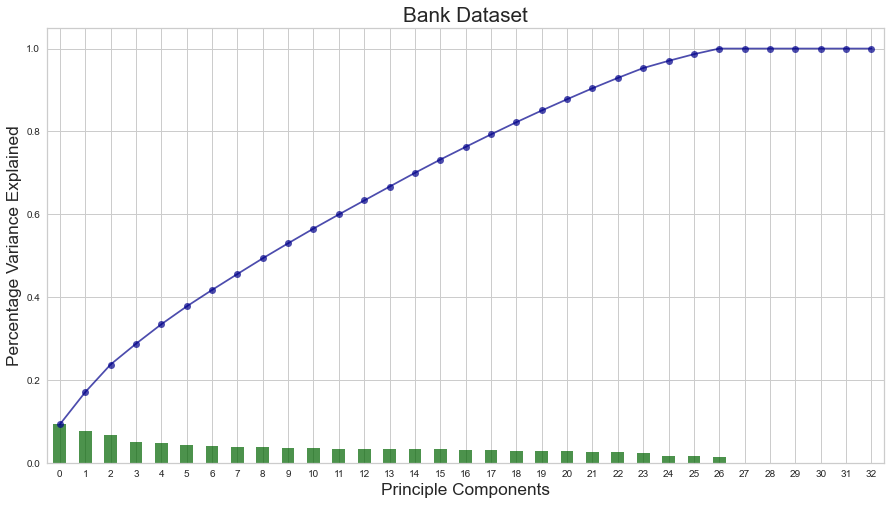

In [313]:
# size of plot
plt.figure(figsize=(15,8))

# exp_var variable have variance ratio
exp_var = pd.Series(pca.explained_variance_ratio_) 
# plot bar chart
exp_var.plot(kind="bar", alpha=0.7, color= 'darkgreen') 

# Calculate the amount of variance explained added by each additional component
total = 0
var_ls = []
for x in exp_var:
    total = total+x
    var_ls.append(total)

#plot line chart of increasing variances
pd.Series(var_ls).plot(marker="o", alpha=0.7, color = 'darkblue' ) 

plt.xlabel("Principle Components", fontsize="x-large")
plt.ylabel("Percentage Variance Explained", fontsize="x-large")
plt.title("Bank Dataset", fontsize="xx-large")
plt.show();

<hr>

### 5. Model Building (Logistic Regression, Random Forest Classifier, Decision Tree Classifier, and Naive Bayes )

#### Testing multiple models

#### Split Data into X1 and y1

In [314]:
# split data
X1 = df.drop(['day','month','campaign','pdays', 'previous' , 'duration', 'poutcome', 'result'],
            axis=1)
y1= df['result']

X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.20, random_state=42)

In [315]:
X1

,cellular,telephone,unknown contact,primary,secondary,tertiary,unknown education,divorced,married,single,...,services,student,technician,unemployed,unknown job,age,default,balance,housing,loan
2,1,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,28,0,654,0,0
3,1,0,0,0,0,1,0,0,1,0,...,0,0,1,0,0,46,0,0,1,0
4,1,0,0,0,1,0,0,0,1,0,...,0,0,1,0,0,54,0,1076,0,0
5,0,1,0,0,0,0,1,0,1,0,...,0,0,0,0,1,53,0,13,0,0
6,1,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,29,0,805,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49696,1,0,0,0,0,0,1,0,0,1,...,0,1,0,0,0,20,0,755,0,0
49701,1,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,30,0,916,0,0
49708,1,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,46,0,461,0,0
49719,1,0,0,1,0,0,0,0,1,0,...,0,0,0,1,0,53,0,980,1,0


In [316]:
y1

2        0
3        0
4        0
5        0
6        0
        ..
49696    1
49701    1
49708    1
49719    1
49723    0
Name: result, Length: 24487, dtype: int32

#### Scale Data

In [317]:
# Instantiate Standard Scaler
scaler = StandardScaler()
# Fit & transform data.
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

#### 1- Logistic Regression 

In [318]:
log_regression = LogisticRegression(random_state = 42)

log_regression.fit(X_train, y_train)

C:\Users\Fatimah Asiri\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression(random_state=42)

In [319]:
log_regression.intercept_

array([-1.25965605])

In [320]:
log_regression.coef_

array([[ 2.70750634e-01,  2.06230547e-01, -1.70914140e+00,
        -7.02541583e-01, -2.12321974e-01, -6.18208519e-02,
        -2.55475806e-01, -3.65392782e-01, -6.14610310e-01,
        -2.52157123e-01,  7.21465456e-02, -6.34135573e-01,
        -2.40149046e-01, -2.50054016e-01, -2.93129974e-01,
         6.18812733e-01, -2.63246947e-01, -2.97792812e-01,
         5.87965912e-01, -5.20889376e-01,  1.22555424e-02,
        -2.39432042e-02, -1.61358708e-02, -1.51682657e-01,
         6.19596246e-04, -8.86632505e-01, -9.15063443e-01]])

In [321]:
y_pred = log_regression.predict(X_test)

print(y_pred)

[0 0 0 ... 0 0 0]


#### Test df  with Actual_Result and Predict_Result

In [322]:
test_df = pd.DataFrame(X_test, columns= ['cellular','telephone','unknown contact','primary','secondary','tertiary',
                                         'unknown education','divorced','married','single','admin.','blue-collar',
                                         'entrepreneur','housemaid','management','retired','self-employed','services',
                                         'student','technician','unemployed','unknown job','age','default','balance',
                                         'housing','loan'])

test_df['Actual_Result'] = y_test.to_numpy()
test_df['Predict_Result'] = y_pred

test_df

,cellular,telephone,unknown contact,primary,secondary,tertiary,unknown education,divorced,married,single,...,technician,unemployed,unknown job,age,default,balance,housing,loan,Actual_Result,Predict_Result
16961,1,0,0,1,0,0,0,0,1,0,...,0,0,0,33,1,-542,1,0,0,0
39866,1,0,0,0,1,0,0,0,1,0,...,0,0,0,32,0,11,0,0,0,0
35692,1,0,0,0,0,1,0,0,0,1,...,1,0,0,40,0,431,0,0,1,0
13386,0,0,1,0,1,0,0,0,0,1,...,0,0,0,30,0,399,1,1,0,0
46110,0,1,0,0,0,1,0,0,1,0,...,0,0,0,45,0,-312,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30669,0,1,0,0,1,0,0,0,1,0,...,0,0,0,58,0,1067,0,0,0,0
29240,0,0,1,0,0,1,0,0,1,0,...,0,0,0,30,0,49,1,1,0,0
38248,1,0,0,0,0,1,0,0,1,0,...,0,0,0,33,0,752,1,0,0,0
8522,0,0,1,0,0,1,0,0,1,0,...,0,0,0,55,0,685,1,0,0,0


#### Count values that Actual_Result == Predict_Result

In [323]:
(test_df['Actual_Result'] == test_df['Predict_Result']).value_counts()

True     4702
False     196
dtype: int64

#### confusion matrix in plot 

C:\Users\Fatimah Asiri\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



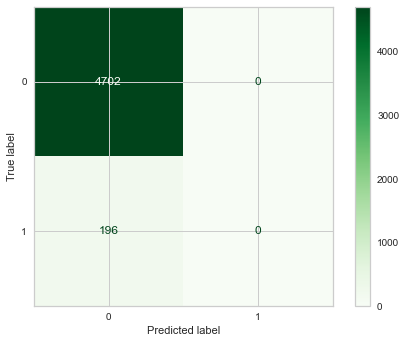

In [324]:
plot_confusion_matrix(log_regression, X=X_test, y_true=y_test, cmap='Greens')

#### Calculate accuracy, precision, and recall

In [325]:
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = 644/(405+644)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = 644 /( 1338 + 644 )
print('Recall: %f' % recall)

Accuracy: 0.959984
Precision: 0.613918
Recall: 0.324924


#### End Logistic Regression

#### 2-  Random Forest Classifier

In [326]:
class_forest = RandomForestClassifier(criterion='gini',
                                 n_estimators=5,
                                 random_state=1,
                                 n_jobs=2)

In [327]:
# Fit the model

class_forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=5, n_jobs=2, random_state=1)

In [328]:
# Measure model performance
#
y_predforest = class_forest.predict(X_test)

#### Test df  with Actual_Result and Predict_Result

In [329]:
test_dfr = pd.DataFrame(X_test, columns= ['cellular','telephone','unknown contact','primary','secondary','tertiary',
                                         'unknown education','divorced','married','single','admin.','blue-collar',
                                         'entrepreneur','housemaid','management','retired','self-employed','services',
                                         'student','technician','unemployed','unknown job','age','default','balance',
                                         'housing','loan'])

test_dfr['Actual_Result'] = y_test.to_numpy()
test_dfr['Predict_Result'] = y_predforest

test_dfr

,cellular,telephone,unknown contact,primary,secondary,tertiary,unknown education,divorced,married,single,...,technician,unemployed,unknown job,age,default,balance,housing,loan,Actual_Result,Predict_Result
16961,1,0,0,1,0,0,0,0,1,0,...,0,0,0,33,1,-542,1,0,0,0
39866,1,0,0,0,1,0,0,0,1,0,...,0,0,0,32,0,11,0,0,0,0
35692,1,0,0,0,0,1,0,0,0,1,...,1,0,0,40,0,431,0,0,1,0
13386,0,0,1,0,1,0,0,0,0,1,...,0,0,0,30,0,399,1,1,0,0
46110,0,1,0,0,0,1,0,0,1,0,...,0,0,0,45,0,-312,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30669,0,1,0,0,1,0,0,0,1,0,...,0,0,0,58,0,1067,0,0,0,0
29240,0,0,1,0,0,1,0,0,1,0,...,0,0,0,30,0,49,1,1,0,0
38248,1,0,0,0,0,1,0,0,1,0,...,0,0,0,33,0,752,1,0,0,0
8522,0,0,1,0,0,1,0,0,1,0,...,0,0,0,55,0,685,1,0,0,0


#### Count values that Actual_Result == Predict_Result

In [330]:
(test_dfr['Actual_Result'] == test_dfr['Predict_Result']).value_counts()

True     4678
False     220
dtype: int64

#### confusion matrix in plot 

C:\Users\Fatimah Asiri\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.

C:\Users\Fatimah Asiri\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names



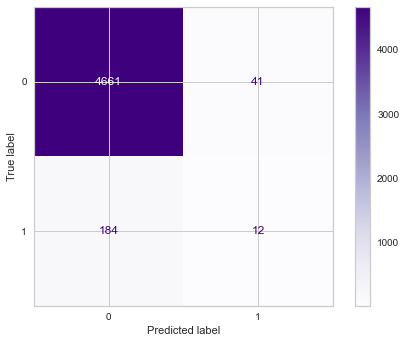

In [331]:
plot_confusion_matrix(class_forest, X_test_sc, y_test,cmap='Purples');

#### Calculate accuracy, precision, and recall

In [332]:
accuracy = accuracy_score(y_test, y_predforest)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = 644/(405+644)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = 644 /( 1338 + 644 )
print('Recall: %f' % recall)

Accuracy: 0.955084
Precision: 0.613918
Recall: 0.324924


#### End Random Forest 

#### 3- Decision Tree Classifier

In [333]:
# Create Decision Tree classifer object
Dec_Tree = DecisionTreeClassifier()

In [334]:
# Train Decision Tree Classifer
Dec_Tree = Dec_Tree.fit(X_train,y_train)

In [335]:
#Predict the response for test dataset
y_predtree = Dec_Tree.predict(X_test)

#### Test df  with Actual_Result and Predict_Result

In [336]:
test_dftree = pd.DataFrame(X_test, columns= ['cellular','telephone','unknown contact','primary','secondary','tertiary',
                                         'unknown education','divorced','married','single','admin.','blue-collar',
                                         'entrepreneur','housemaid','management','retired','self-employed','services',
                                         'student','technician','unemployed','unknown job','age','default','balance',
                                         'housing','loan'])

test_dftree['Actual_Result'] = y_test.to_numpy()
test_dftree['Predict_Result'] = y_predtree

test_dftree

,cellular,telephone,unknown contact,primary,secondary,tertiary,unknown education,divorced,married,single,...,technician,unemployed,unknown job,age,default,balance,housing,loan,Actual_Result,Predict_Result
16961,1,0,0,1,0,0,0,0,1,0,...,0,0,0,33,1,-542,1,0,0,0
39866,1,0,0,0,1,0,0,0,1,0,...,0,0,0,32,0,11,0,0,0,0
35692,1,0,0,0,0,1,0,0,0,1,...,1,0,0,40,0,431,0,0,1,0
13386,0,0,1,0,1,0,0,0,0,1,...,0,0,0,30,0,399,1,1,0,0
46110,0,1,0,0,0,1,0,0,1,0,...,0,0,0,45,0,-312,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30669,0,1,0,0,1,0,0,0,1,0,...,0,0,0,58,0,1067,0,0,0,0
29240,0,0,1,0,0,1,0,0,1,0,...,0,0,0,30,0,49,1,1,0,0
38248,1,0,0,0,0,1,0,0,1,0,...,0,0,0,33,0,752,1,0,0,0
8522,0,0,1,0,0,1,0,0,1,0,...,0,0,0,55,0,685,1,0,0,0


#### Count values that Actual_Result == Predict_Result

In [337]:
(test_dftree['Actual_Result'] == test_dftree['Predict_Result']).value_counts()

True     4610
False     288
dtype: int64

#### confusion matrix in plot 

C:\Users\Fatimah Asiri\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.

C:\Users\Fatimah Asiri\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names



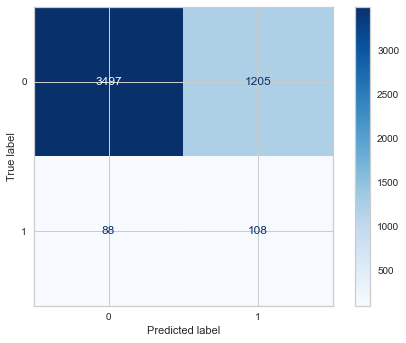

In [338]:
plot_confusion_matrix(Dec_Tree, X_test_sc, y_test,cmap='Blues');

#### Calculate accuracy, precision, and recall

In [339]:
accuracy = accuracy_score(y_test, y_predtree)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = 644/(405+644)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = 644 /( 1338 + 644 )
print('Recall: %f' % recall)

Accuracy: 0.941200
Precision: 0.613918
Recall: 0.324924


#### End Decision Tree

#### 4- Naive Bayes

In [340]:
# Create Naive Bayes object

model = BernoulliNB().fit(X_train, y_train)

In [341]:
# Fit the model on train dataset

model.fit(X_train, y_train)

BernoulliNB()

In [342]:
#Predict the response for test dataset

predicted_signal = model.predict(X_test)

#### Test df  with Actual_Result and Predict_Result

In [343]:
test_dftree = pd.DataFrame(X_test, columns= ['cellular','telephone','unknown contact','primary','secondary','tertiary',
                                         'unknown education','divorced','married','single','admin.','blue-collar',
                                         'entrepreneur','housemaid','management','retired','self-employed','services',
                                         'student','technician','unemployed','unknown job','age','default','balance',
                                         'housing','loan'])

test_dftree['Actual_Result'] = y_test.to_numpy()
test_dftree['Predict_Result'] = predicted_signal

test_dftree

,cellular,telephone,unknown contact,primary,secondary,tertiary,unknown education,divorced,married,single,...,technician,unemployed,unknown job,age,default,balance,housing,loan,Actual_Result,Predict_Result
16961,1,0,0,1,0,0,0,0,1,0,...,0,0,0,33,1,-542,1,0,0,0
39866,1,0,0,0,1,0,0,0,1,0,...,0,0,0,32,0,11,0,0,0,0
35692,1,0,0,0,0,1,0,0,0,1,...,1,0,0,40,0,431,0,0,1,0
13386,0,0,1,0,1,0,0,0,0,1,...,0,0,0,30,0,399,1,1,0,0
46110,0,1,0,0,0,1,0,0,1,0,...,0,0,0,45,0,-312,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30669,0,1,0,0,1,0,0,0,1,0,...,0,0,0,58,0,1067,0,0,0,0
29240,0,0,1,0,0,1,0,0,1,0,...,0,0,0,30,0,49,1,1,0,0
38248,1,0,0,0,0,1,0,0,1,0,...,0,0,0,33,0,752,1,0,0,0
8522,0,0,1,0,0,1,0,0,1,0,...,0,0,0,55,0,685,1,0,0,0


#### Count values that Actual_Result == Predict_Result

In [344]:
(test_dftree['Actual_Result'] == test_dftree['Predict_Result']).value_counts()

True     4619
False     279
dtype: int64

#### confusion matrix in plot 

C:\Users\Fatimah Asiri\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.

C:\Users\Fatimah Asiri\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but BernoulliNB was fitted with feature names



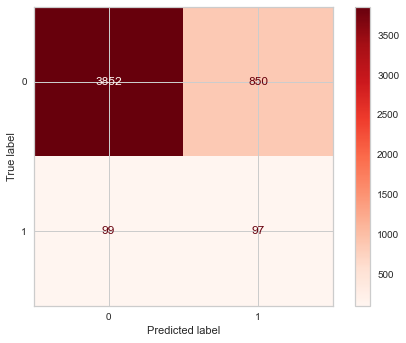

In [345]:
plot_confusion_matrix(model, X_test_sc, y_test,cmap='Reds');

#### Calculate accuracy, precision, and recall

In [346]:
accuracy = accuracy_score(y_test, predicted_signal)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = 644/(405+644)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = 644 /( 1338 + 644 )
print('Recall: %f' % recall)

Accuracy: 0.943038
Precision: 0.613918
Recall: 0.324924


#### End Naive Bayes

<hr>

### 6. Model Selection

<center><h4> Tabel of Comparing between Models </h4></center><br>

  | | Score   |  Logistic Regression    |  Random Forest Classifier  |  Decision Tree   |  Naive Bayes   |
|---:|:-------------|:-----------|:------|:------|:------|
|  | Accuracy  | 0.959       |  0.955   |  0.938     |  0.943    |
|  | Precision  | 0.61   |  0.61  | 0.61     |  0.61     |
|  | Recall  |  0.33    | 0.33 | 0.33    |  0.33     |

#### <b>So, The best model is Logistic Regression based on Accuracy, Precision, Recall</b>

<hr>

### 7. Report ROC-AUC 

<h4><b>ROC curve </h4></b>
An <b> ROC curve (receiver operating characteristic curve)</b> is a graph showing the performance of a classification model at all classification thresholds. This curve plots two parameters: <br>
1. True Positive Rate <br>
2. False Positive Rate <br> <br>

<b>True Positive Rate (TPR) is a synonym for recall and is therefore defined as follows: </b><br>

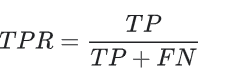

<b> False Positive Rate (FPR) is defined as follows:</b> <br>

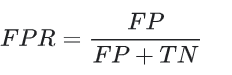

An ROC curve plots TPR vs. FPR at different classification thresholds. Lowering the classification threshold classifies more items as positive, thus increasing both False Positives and True Positives. The following figure shows a typical ROC curve. <br>

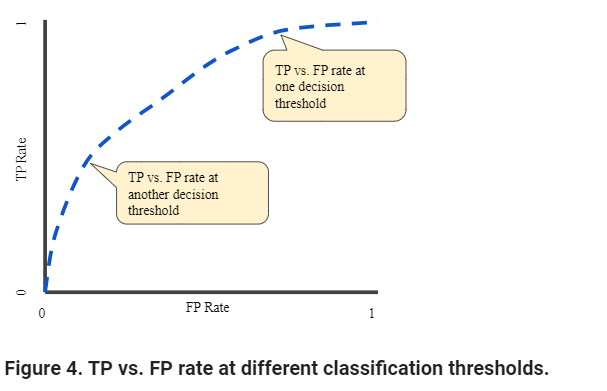

To compute the points in an ROC curve, we could evaluate a logistic regression model many times with different classification thresholds, but this would be inefficient. Fortunately, there's an efficient, sorting-based algorithm that can provide this information for us, called AUC.

<h4><b> AUC: Area Under the ROC Curve </h4></b>

<b>AUC</b> stands for "Area under the ROC Curve." That is, AUC measures the entire two-dimensional area underneath the entire ROC curve (think integral calculus) from (0,0) to (1,1).

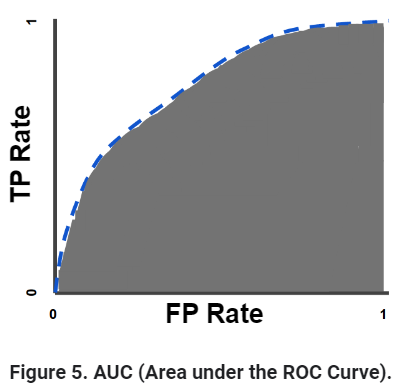


AUC provides an aggregate measure of performance across all possible classification thresholds. One way of interpreting AUC is as the probability that the model ranks a random positive example more highly than a random negative example. For example, given the following examples, which are arranged from left to right in ascending order of logistic regression predictions:

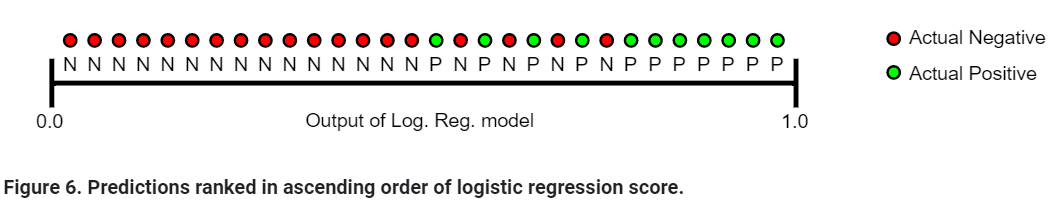


AUC represents the probability that a random positive (green) example is positioned to the right of a random negative (red) example.

AUC ranges in value from 0 to 1. A model whose predictions are 100% wrong has an AUC of 0.0; one whose predictions are 100% correct has an AUC of 1.0.

AUC is desirable for the following two reasons:

- AUC is <b>scale-invariant</b>. It measures how well predictions are ranked, rather than their absolute values.

- AUC is <b>classification-threshold-invariant</b>. It measures the quality of the model's predictions irrespective of what classification threshold is chosen.


However, both these reasons come with caveats, which may limit the usefulness of AUC in certain use cases:

- <b> Scale invariance is not always desirable.</b> For example, sometimes we really do need well calibrated probability outputs, and AUC won’t tell us about that.

- <b> Classification-threshold invariance is not always desirable.</b> In cases where there are wide disparities in the cost of false negatives vs. false positives, it may be critical to minimize one type of classification error. For example, when doing email spam detection, you likely want to prioritize minimizing false positives (even if that results in a significant increase of false negatives). AUC isn't a useful metric for this type of optimization.

#### 1. Plot the ROC Curve

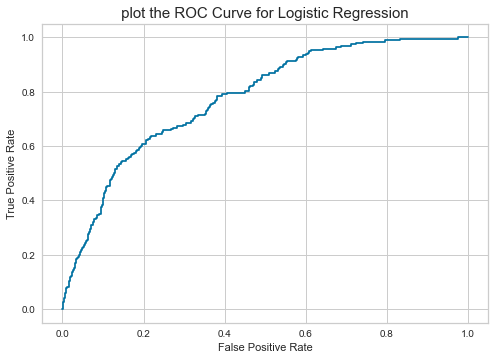

In [347]:
# Logistic Regression
#define metrics
#figure title
plt.title(" plot the ROC Curve for Logistic Regression ", loc="center",fontsize='15')

y_pred_proba = log_regression.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

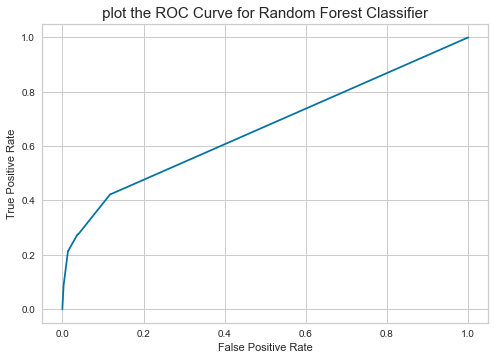

In [348]:
#  Random Forest Classifier
#define metrics

plt.title(" plot the ROC Curve for Random Forest Classifier ", loc="center",fontsize='15')

y_pred_proba = class_forest.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

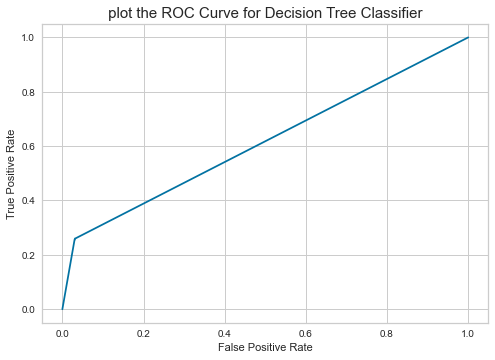

In [349]:
#  Decision Tree
#define metrics

plt.title(" plot the ROC Curve for Decision Tree Classifier ", loc="center",fontsize='15')

y_pred_proba = Dec_Tree.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

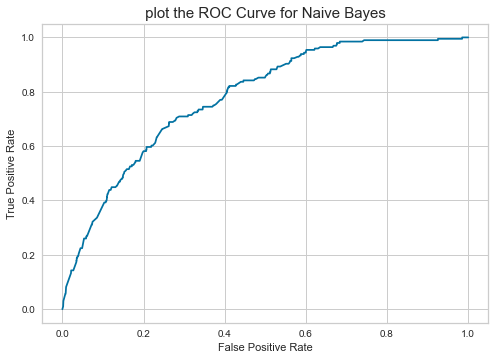

In [350]:
# Naive Bayes 
#define metrics

plt.title(" plot the ROC Curve for Naive Bayes ", loc="center",fontsize='15')

y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#### 2. Calculate the AUC

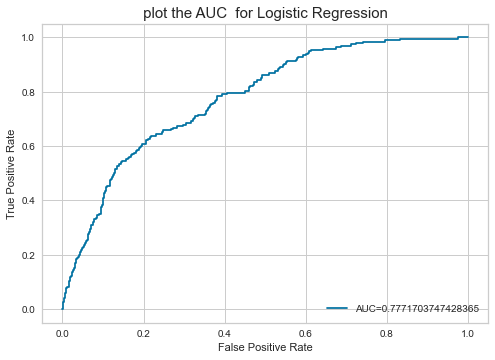

In [351]:
# Logistic Regression
# define metrics

plt.title(" plot the AUC  for Logistic Regression ", loc="center",fontsize='15')

y_pred_proba = log_regression.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

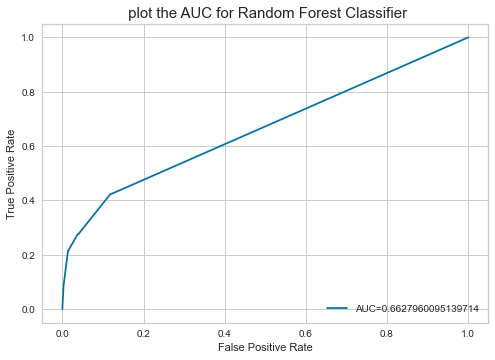

In [352]:
# Random Forest Classifier

#define metrics

plt.title(" plot the AUC for Random Forest Classifier", loc="center",fontsize='15')

y_pred_proba = class_forest.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

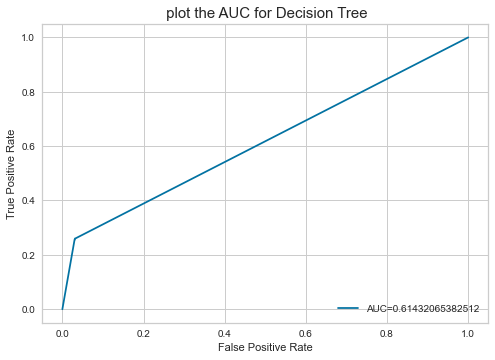

In [353]:
# Decision Tree
#define metrics

plt.title(" plot the AUC for Decision Tree", loc="center",fontsize='15')

y_pred_proba = Dec_Tree.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

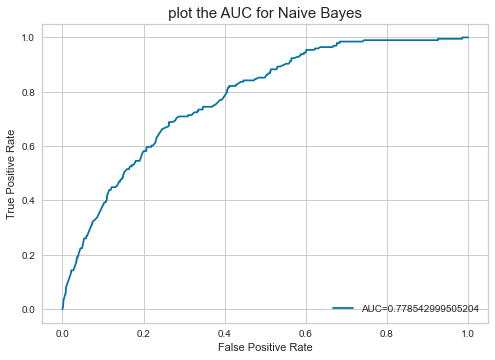

In [354]:
# Naive Bayes
#define metrics

plt.title(" plot the AUC for Naive Bayes ", loc="center",fontsize='15')

y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

<hr>

### 8. Performance Reporting

# <center> Bank Marketing (Campaign) </center>
 

### Table of Contents
1. Abstract/Project Summary
2. Introduction
3. Dataset description
4. Methods and Algorithms
5. Detailed Analysis
6. Final results
7. Conclusion
8. References
_____________________
    
#### 1. Abstract/Project Summary.
- Bank Marketing (Campaign)
- For this project, ABC Bank wants to sell its term deposit product to customers and before launching the product they want to develop a model which helps in understanding whether a particular customer will buy its product or not (based on the customer's past interaction with the bank or other Financial institutions).
__________________

#### 2. Introduction
- Bank wants to use the ML model to shortlist customer whose chances of buying the product is more so that their marketing channels marketing SMS/email marketing, etc. can focus only on those customers whose chances of buying the product is more.
- This will save resources and time (which is directly involved in the cost (of resource billing).
- Develop a model with Duration and without duration features and report the performance of the model.
- Based on PCA for the features, I choosed just 27 columns from dataset (job, contact, loan, default,age, bousing, balance, marital, and education).
_____________

#### 3. Dataset description
Attribute Information:

Input variables:
- bank client data:
1 - age (numeric)

2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

5 - default: has credit in default? (categorical: 'no','yes','unknown')

6 - housing: has housing loan? (categorical: 'no','yes','unknown')

7 - loan: has personal loan? (categorical: 'no','yes','unknown')

8 - contact: contact communication type (categorical: 'cellular','telephone')related with the last contact of the current campaign

9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

10 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

11 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

12 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

13 - previous: number of contacts performed before this campaign and for this client (numeric)

14 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

15 - y: The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).
_________________________________

#### 4. Methods and Algorithms.

In this project, I used several of methods and Algorithms

_______________________________
#### 5. Detailed Analysis.
The next step involves defining all the approaches, tools, and techniques used in the project. In Bank Marketing (Campaign) project report,
- First: Prepossessing step:
Check for null and missing values
Check for duplicate rows 
One hot encoding for ( job, marital,  education, contact)
Label encoding for ( month, poutcome, loan, default, housing, y)

- Second:PCA
Split Data to x and y 
Fit & transform data 
Apply PCA
Varinace Ratio
Scree Plot (Line plot chart of increasing variances)
- Third: Build Multiple models 
for every model have 
    1. Test df  with Actual_Result and Predict_Result
    2. Count values that Actual_Result == Predict_Result
    3. Confusion Matrix in plot 
    4. Calculate Accuracy, Precision, and Recall
    
Logistic Regression: Accuracy: 0.95, Precision: 0.6, Recall: 0.33
Random Forest Classifier: Accuracy: 0.94, Precision: 0.6, Recall: 0.33
Decision Tree: Accuracy: 0.91, Precision: 0.6, Recall: 0.33

The Best model is (Logistic Regression) based on Accuracy, Precision, Recall
_______________________

#### 6. Final results

The model can predict a 0.95 form result so, In the future, I would to improve the model to increase the value and the bank in another campaign. 

Employees should take the most important from clients to get the right data such as job, education, age, whether the clinet has a housing loan or not, whether the client has a loan before or not, whether the client has a credit card or not, balance,  and what is the marital status for the client.


_____________________________

#### 7. Conclusion

After doing EDA, Feature Engineering, PCA, and Test Multiple models. 
In the Future, I will be testing more models to improve the result to help the banking sector in future campaigns.

___________________________
#### 8. References

Data set UCI link:  https://archive.ics.uci.edu/ml/datasets/Bank+Marketing



<hr>

### 9. Converting ML metrics into Business metric and explaining result to business

1. Confusion Matrix
2. F1 Score
3. Gain and Lift charts

#### 1. Confusion Matrix

C:\Users\Fatimah Asiri\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



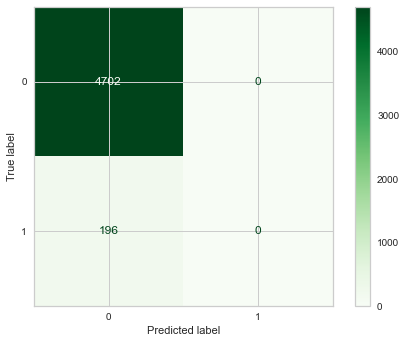

In [355]:
plot_confusion_matrix(log_regression, X=X_test, y_true=y_test, cmap='Greens')

In [356]:
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = 644/(405+644)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = 644 /( 1338 + 644 )
print('Recall: %f' % recall)

Accuracy: 0.959984
Precision: 0.613918
Recall: 0.324924


#### 2. F1 Score

In [357]:
# F1 Score = 2 * (Precision * Recall) / (Precision + Recall)
# where:
# Precision: Correct positive predictions relative to total positive predictions
# Recall: Correct positive predictions relative to total actual positives

F1_Score = 2 * (0.613918 * 0.324924) / (0.613918 + 0.324924)
F1_Score


0.4249419864726972

#### 3. Gain and Lift charts

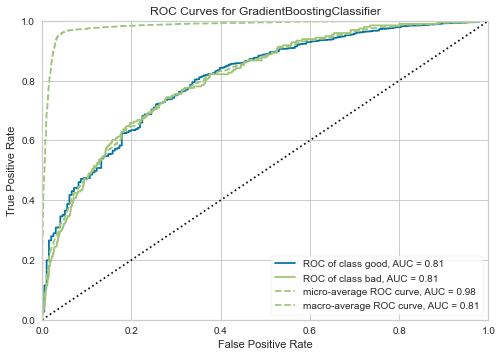

<AxesSubplot:title={'center':'ROC Curves for GradientBoostingClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [358]:
# Fit a Gradient Boosting Machine and examine the ROC AUC graph.
gbm = GradientBoostingClassifier(n_estimators=500)

visualizer = ROCAUC(gbm, classes=[ "good", "bad"])
visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)        
visualizer.show()

In [359]:
# Calculate the Lift and Gain Charts
X_test['predicted_probability'] = gbm.predict_proba(X_test)[:,1] # Predicted Proba for bads(=1)
X_test['Result'] = y_test #Ground Truth
X_test.head()

,cellular,telephone,unknown contact,primary,secondary,tertiary,unknown education,divorced,married,single,...,technician,unemployed,unknown job,age,default,balance,housing,loan,predicted_probability,Result
16961,1,0,0,1,0,0,0,0,1,0,...,0,0,0,33,1,-542,1,0,0.002130,0
39866,1,0,0,0,1,0,0,0,1,0,...,0,0,0,32,0,11,0,0,0.030627,0
35692,1,0,0,0,0,1,0,0,0,1,...,1,0,0,40,0,431,0,0,0.061521,1
13386,0,0,1,0,1,0,0,0,0,1,...,0,0,0,30,0,399,1,1,0.004616,0
46110,0,1,0,0,0,1,0,0,1,0,...,0,0,0,45,0,-312,0,0,0.007168,0


In [360]:
#Sort the data in descending order of predicted probabilities.
X_test = X_test.sort_values(by='predicted_probability', ascending=False)
X_test.head()

,cellular,telephone,unknown contact,primary,secondary,tertiary,unknown education,divorced,married,single,...,technician,unemployed,unknown job,age,default,balance,housing,loan,predicted_probability,Result
43997,1,0,0,0,0,0,1,0,0,1,...,0,0,0,18,0,438,0,0,0.961304,0
42676,1,0,0,0,1,0,0,0,0,1,...,0,0,0,18,0,5,0,0,0.954289,0
7214,1,0,0,0,1,0,0,0,1,0,...,0,0,0,63,0,-40,0,0,0.950498,0
2110,1,0,0,1,0,0,0,1,0,0,...,0,0,0,68,0,250,0,0,0.924664,1
42789,1,0,0,0,0,1,0,0,0,1,...,1,0,0,25,0,1231,0,0,0.838348,1


In [361]:
#Cut deciles based on the predicted probabilities
X_test['decile_group'] = pd.qcut(X_test['predicted_probability'], 10)
X_test.head()

,cellular,telephone,unknown contact,primary,secondary,tertiary,unknown education,divorced,married,single,...,unemployed,unknown job,age,default,balance,housing,loan,predicted_probability,Result,decile_group
43997,1,0,0,0,0,0,1,0,0,1,...,0,0,18,0,438,0,0,0.961304,0,"(0.0891, 0.961]"
42676,1,0,0,0,1,0,0,0,0,1,...,0,0,18,0,5,0,0,0.954289,0,"(0.0891, 0.961]"
7214,1,0,0,0,1,0,0,0,1,0,...,0,0,63,0,-40,0,0,0.950498,0,"(0.0891, 0.961]"
2110,1,0,0,1,0,0,0,1,0,0,...,0,0,68,0,250,0,0,0.924664,1,"(0.0891, 0.961]"
42789,1,0,0,0,0,1,0,0,0,1,...,0,0,25,0,1231,0,0,0.838348,1,"(0.0891, 0.961]"


In [362]:
lift = X_test.groupby('decile_group').agg( #Group by Deciles of Predicted Probabilties
[
    'count', #The total number of customers(data points) in the decile
    'sum', #The total number of bad customers(Risk=1)
]
)['Result'].sort_index(ascending=False)
lift.columns = ['Number of customers','Number of goods']
lift['Cumulative goods'] = lift['Number of goods'].cumsum() #Cumulative Sum of the number of bads
#Calculate Gain = Cumulative Percent of Events/Bads
lift['Percent of Events'] = lift['Number of goods']/lift['Number of goods'].sum()*100
lift['Gain'] = lift['Percent of Events'].cumsum() 
#Calculate Lift = Ratio of Bads to the number of data points in the decile
lift['Lift'] = lift['Gain']/np.array(range(10,100+10,10))
lift.head(10)

,Number of customers,Number of goods,Cumulative goods,Percent of Events,Gain,Lift
decile_group,,,,,,
"(0.0891, 0.961]",490,85,85,43.367347,43.367347,4.336735
"(0.0527, 0.0891]",490,39,124,19.897959,63.265306,3.163265
"(0.0365, 0.0527]",490,22,146,11.224490,74.489796,2.482993
"(0.0253, 0.0365]",489,15,161,7.653061,82.142857,2.053571
"(0.0172, 0.0253]",490,9,170,4.591837,86.734694,1.734694
"(0.0109, 0.0172]",490,14,184,7.142857,93.877551,1.564626
"(0.00699, 0.0109]",489,4,188,2.040816,95.918367,1.370262
"(0.00453, 0.00699]",490,5,193,2.551020,98.469388,1.230867
"(0.00279, 0.00453]",490,2,195,1.020408,99.489796,1.105442


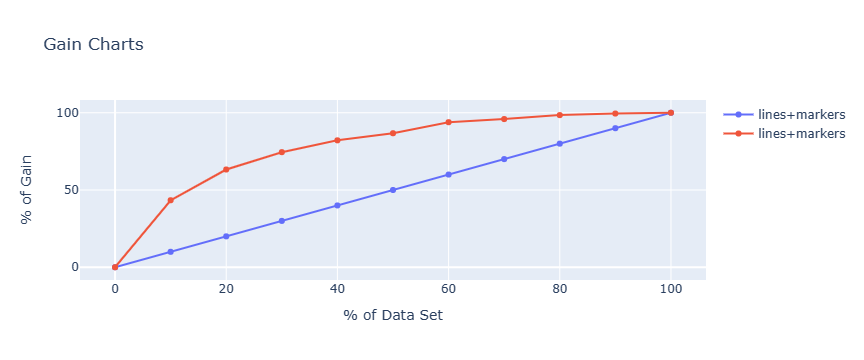

In [363]:
# Plot the Charts


gain = lift.Gain.tolist()
gain.insert(0,0)
fig = go.Figure()
fig.add_trace(go.Scatter(x=list(range(0,100+10,10)), y=list(range(0,100+10,10)),
                    mode='lines+markers',
                    name='lines+markers'))
fig.add_trace(go.Scatter(x=list(range(0,100+10,10)), y=gain,
                    mode='lines+markers',
                    name='lines+markers'))

fig.update_xaxes(
        title_text = "% of Data Set",
)

fig.update_yaxes(
        title_text = "% of Gain",
        )
fig.update_layout(title='Gain Charts',)

fig.show()

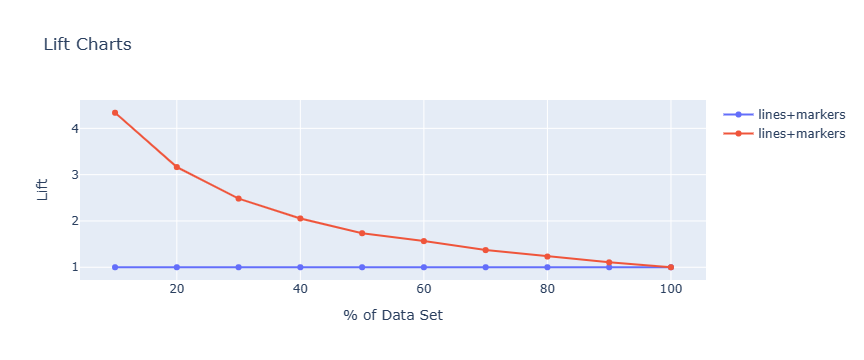

In [364]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=list(range(10,100+10,10)), y=np.repeat(1,10),
                    mode='lines+markers',
                    name='lines+markers'))
fig.add_trace(go.Scatter(x=list(range(10,100+10,10)), y=lift.Lift,
                    mode='lines+markers',
                    name='lines+markers'))

fig.update_xaxes(
        title_text = "% of Data Set",
)

fig.update_yaxes(
        title_text = "Lift",
        )
fig.update_layout(title='Lift Charts',)

fig.show()

<hr>

# Done